# Methodology 1 (Seperate models)

In [1]:
import os  
main_directory = os.chdir("..")

In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Datapreprocessing import DataCleaning, DataTransformation, Data_split
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Datavisualization import Visualization, InferencePlots, plot_scatter_with_categories, plot_scatter_with_categories_and_std, plot_heatmap_mae, plot_heatmap_count
from ML_metallic_materials_fatigue_assessor.ML_pipeline.Train_Predict_Plot import ML_Models_Train

# Aluminum

JSMS + DaBef dataset

In [4]:
data_jsms_alu = pd.read_excel(r"data\05_Final Data\JSMS Data Aluminium.xlsx")
data_dabef_alu = pd.read_excel(r"data\05_Final Data\DaBef Data Aluminium.xlsx")

columns = ['CodeSeries', 'Material', 'Rm', 'Kt', 'G0', 'R_ratio', 'L_Type', 'Stress_Type', 'Control', 'FT_Env_T', 'FT_Env_M', 's_d', 's_d_local', 'SD_FKM_local', 'SD_FKM_nominal']   

data_jsms_alu = data_jsms_alu[columns]
data_dabef_alu = data_dabef_alu[columns]

data_aluminum = pd.concat((data_jsms_alu, data_dabef_alu), axis=0, ignore_index=True)

In [44]:

##################################################################################################################################################################################################

# Define features and labels
mech_prop_fea = ['Rm'] 
comp_design_fea = ['Kt', 'R_ratio', 'L_Type'] 
columns_features =  comp_design_fea + mech_prop_fea 
column_target = ['s_d']

# List of columns where missing instance entire row will be removed
columns_remove_missingvalues = mech_prop_fea + comp_design_fea + column_target 

# Dictnory specifying column names t be filtered and data to be kept in respective column
columns_filter = {'FT_Env_T': ['RT'], 'FT_Env_M': ['air'], 'Stress_Type': ['CONSTANT STRESS RATIO'], 'Control':['load','Force','Stress'], 'L_Type':['Bending','Torsion','Tension-compression']}  

# Condition to exclude data points where runouts are absent. Set True for model prediction of 's_d' and 'n_e', set False for 'k' and 'one_t_s' predictions 
exclude_norunnouts = True
feature_name = 's_d'
# Outlier handling method
condition_outlierdetection =True
columns_outlier = column_target 
detection_method_factor = {'method' : 'iqr', 'factor' : 1.5}                      # 'zscore' or 'iqr'
handling_method = 'remove'                                                        # 'remove' or 'cap'

##################################################################################################################################################################################################

# List of columsns for imputing number, string, mean, median or custom functions at missing values.
columns_impute = {}                                                                                                               

# List of categorical columns for data encoding either with ordinalencoder or onehot encoder 
columns_categorical_dataencoding = ['L_Type']  
dataencoding_method = 'ordinalencoder'                                                                                                                              

# Select columns to rescale for training
con_scale = True
scale_method = "normalization"                                               # normalization/ standardization

##################################################################################################################################################################################################

columns_visualization = column_target 
columns_pairplots =  {'Mechanical properties' : ['Rm', 's_d']}
columns_contourplots = {'Mechanical properties' : ['Rm', 's_d']}

##################################################################################################################################################################################################

# Data split into train, validation and test data.
train_splitsize = 0.7
test_splitsize = 0.5
batch_size = 29
datasplit_seed = 20
custom_datasplit = True
method = {'Kfold': 5}                                # Keys: Quartile/ Categorical/ Kfold/ Custom-Kfold

##################################################################################################################################################################################################

model_seed = 42

##################################################################################################################################################################################################


In [56]:
pipeline = Pipeline([
    ('DataCleaning',DataCleaning(columns_remove_missingvalues, columns_filter, exclude_norunnouts, feature_name, condition_outlierdetection, columns_outlier, detection_method_factor, handling_method)),
    ('DataTransformation',DataTransformation(columns_features, column_target, columns_impute, columns_categorical_dataencoding, dataencoding_method, con_scale, scale_method)),
    ('Visualization', Visualization(columns_visualization, columns_pairplots, metal_name="Aluminium")),
    ('Data_split', Data_split(columns_features, column_target, train_splitsize, test_splitsize, datasplit_seed, batch_size, custom_datasplit, method, columns_pairplots, columns_contourplots)),
    ('Model training', ML_Models_Train(method, 'K', custom_datasplit, model_seed, con_hypopt=False, con_deter_models=True, con_prob_models=False, con_descale=True))  
])

Data cleaning step completed
Data transformation step completed


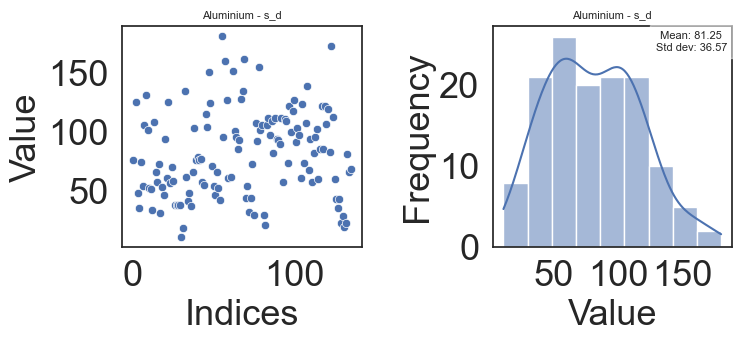

Data visualisation step completed
Number of folds: 5
Train data: 78
Val data: 26
Test data: 26

Fold 1/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Descaled error
Mean absolute error: {'LR': 29.00496580599772, 'RF': 15.375948014954389, 'SVR': 18.762535845387763, 'KNN': 23.379459053933246, 'NN': 14.605147580160097}
Mean squared error: {'LR': 1157.7043487158912, 'RF': 465.9108745976333, 'SVR': 540.4390316233458, 'KNN': 855.793791480089, 'NN': 369.67279604292946}

Fold 2/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Descaled error
Mean absolute error: {'LR': 23.853577783838766, 'RF': 13.0536695761786, 'SVR': 11.474666920497278, 'KNN': 21.678674945896905, 'NN': 10.373106202644344}
Mean squared error: {'L

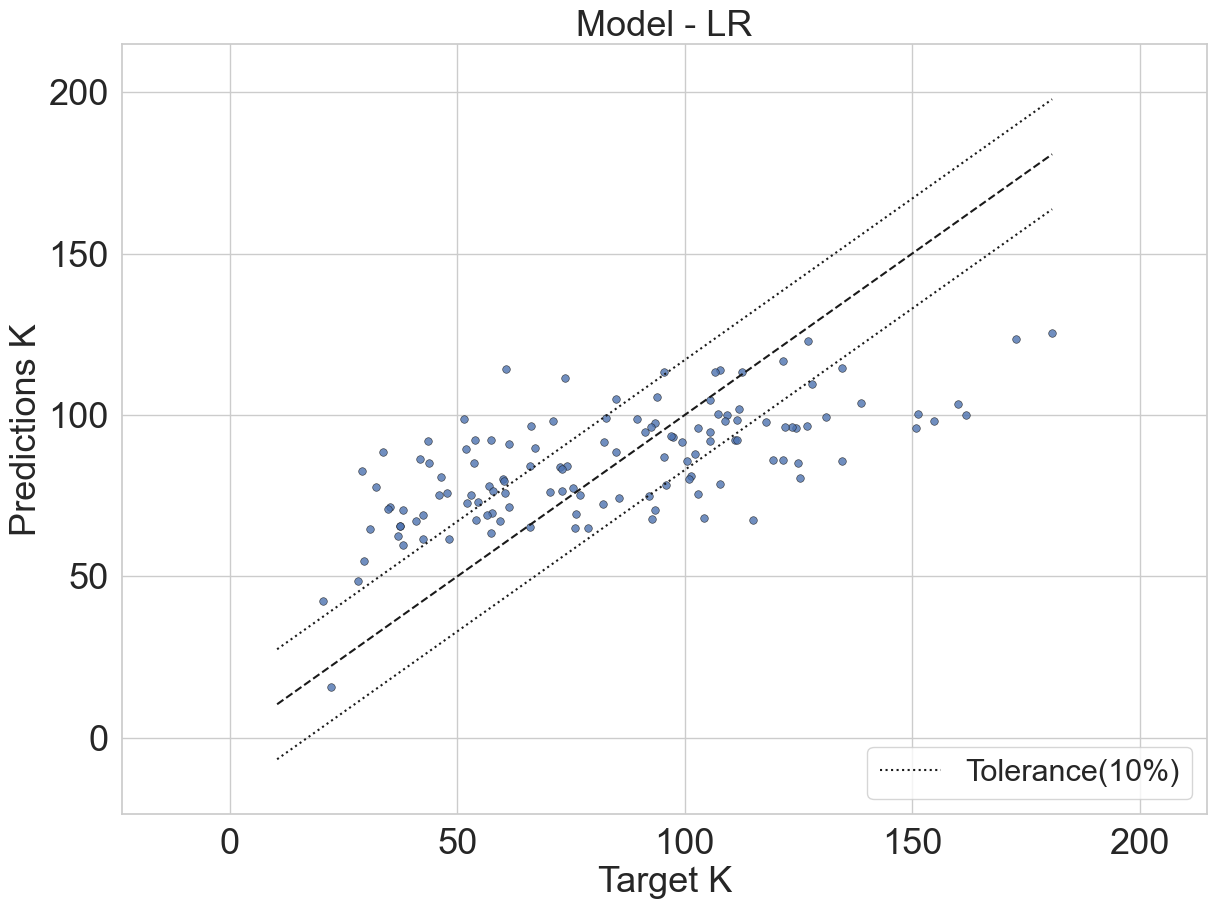

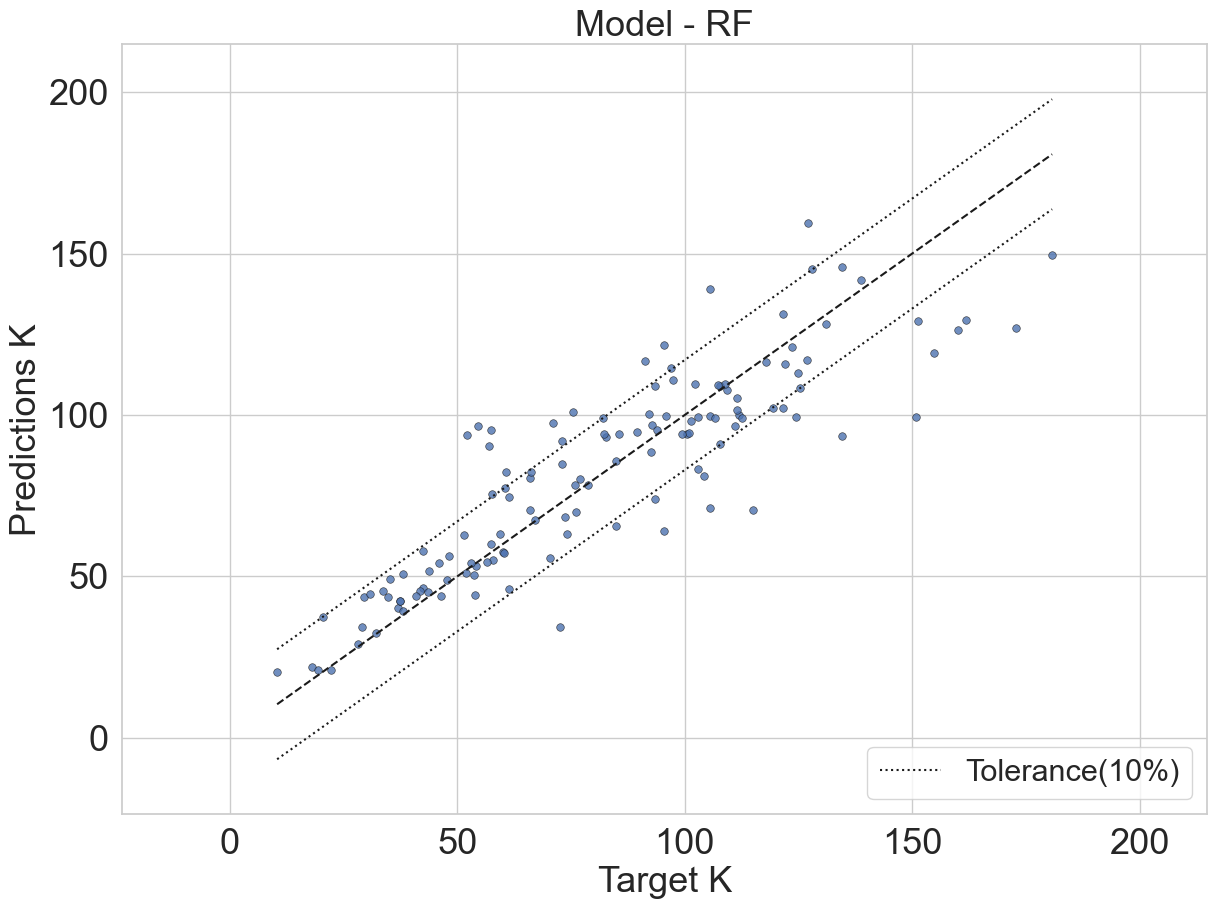

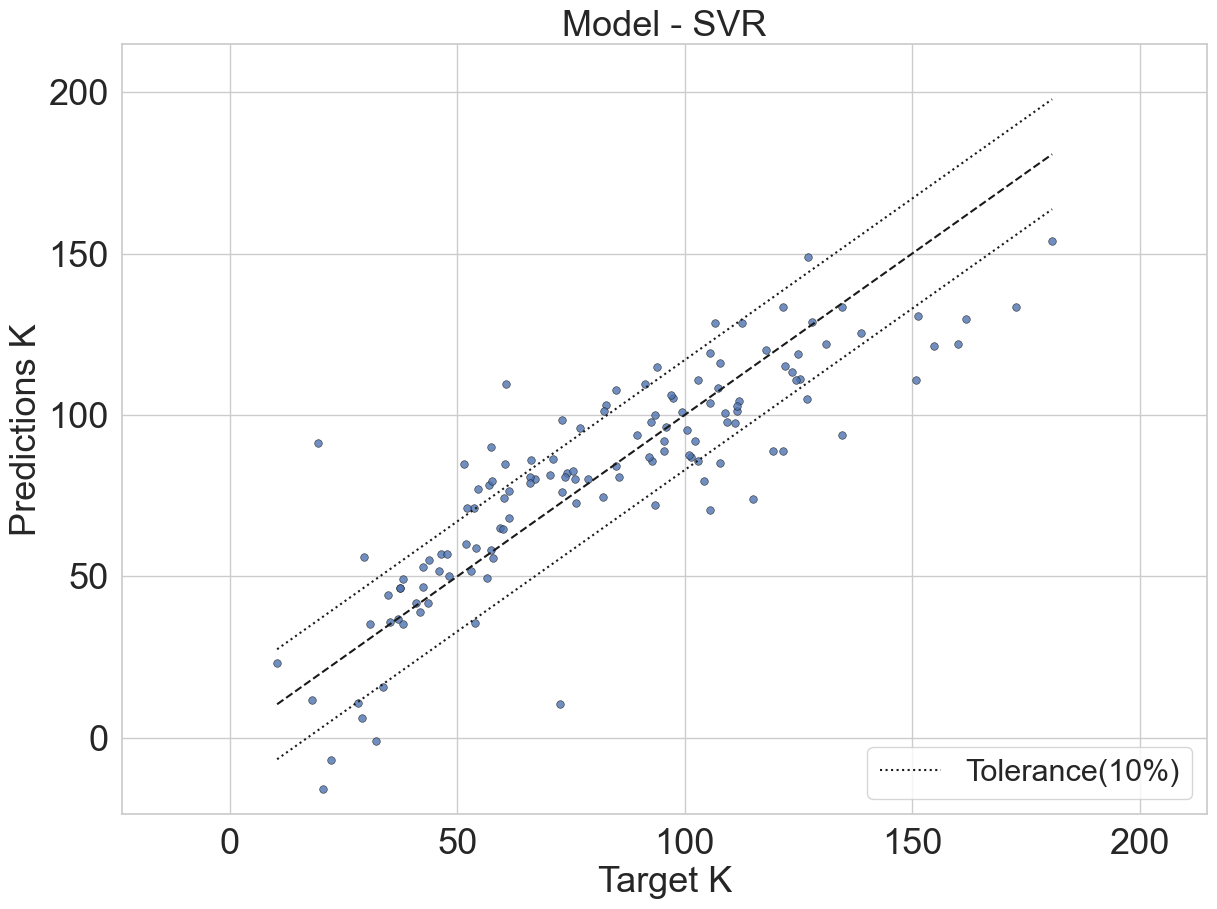

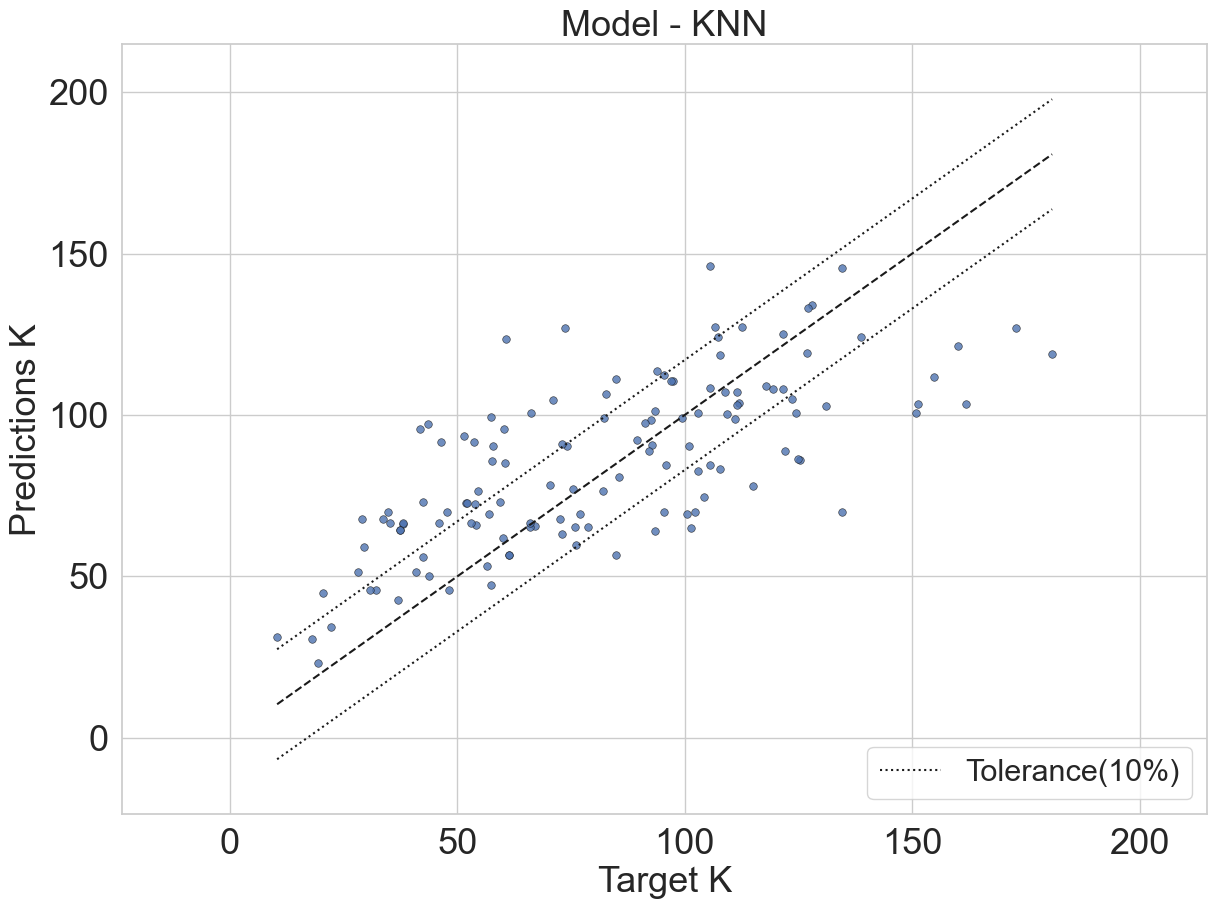

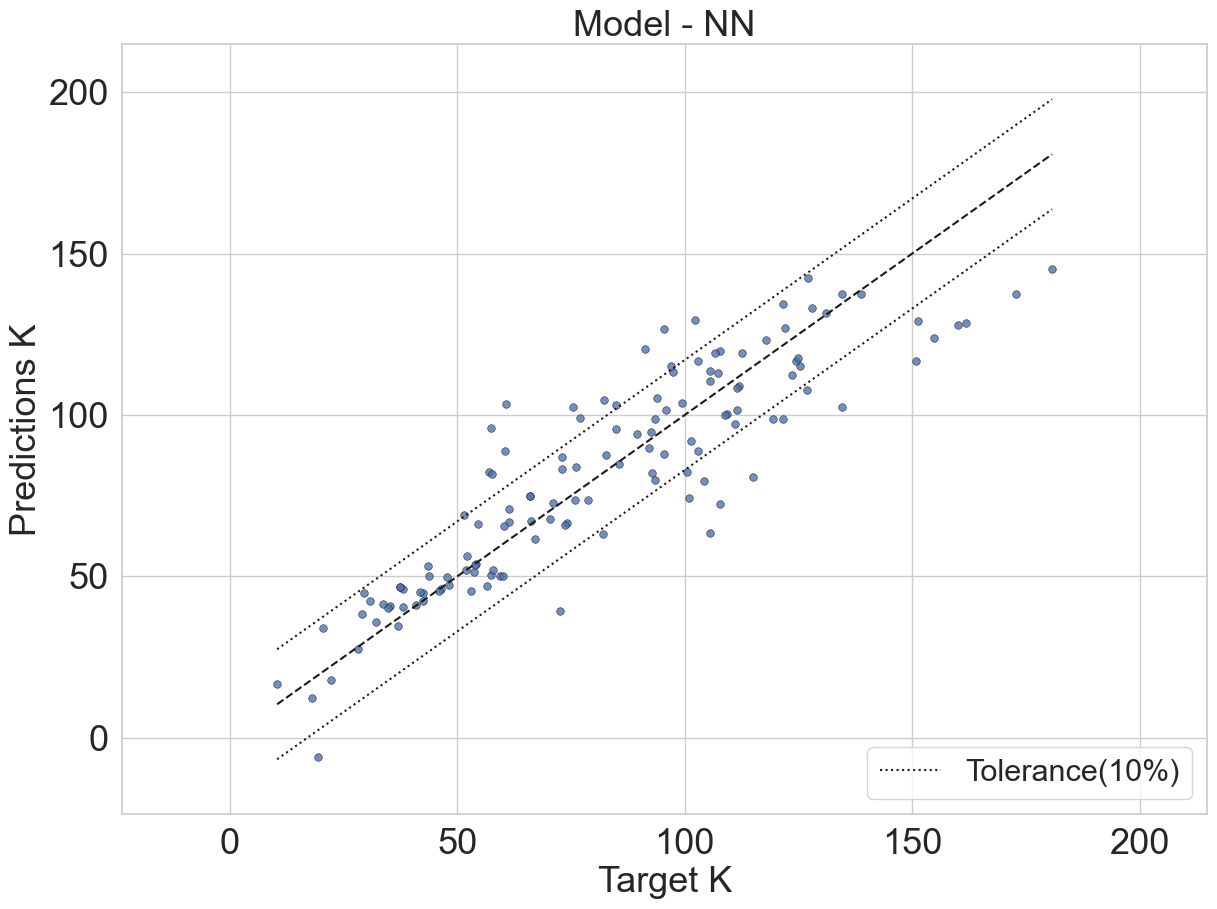

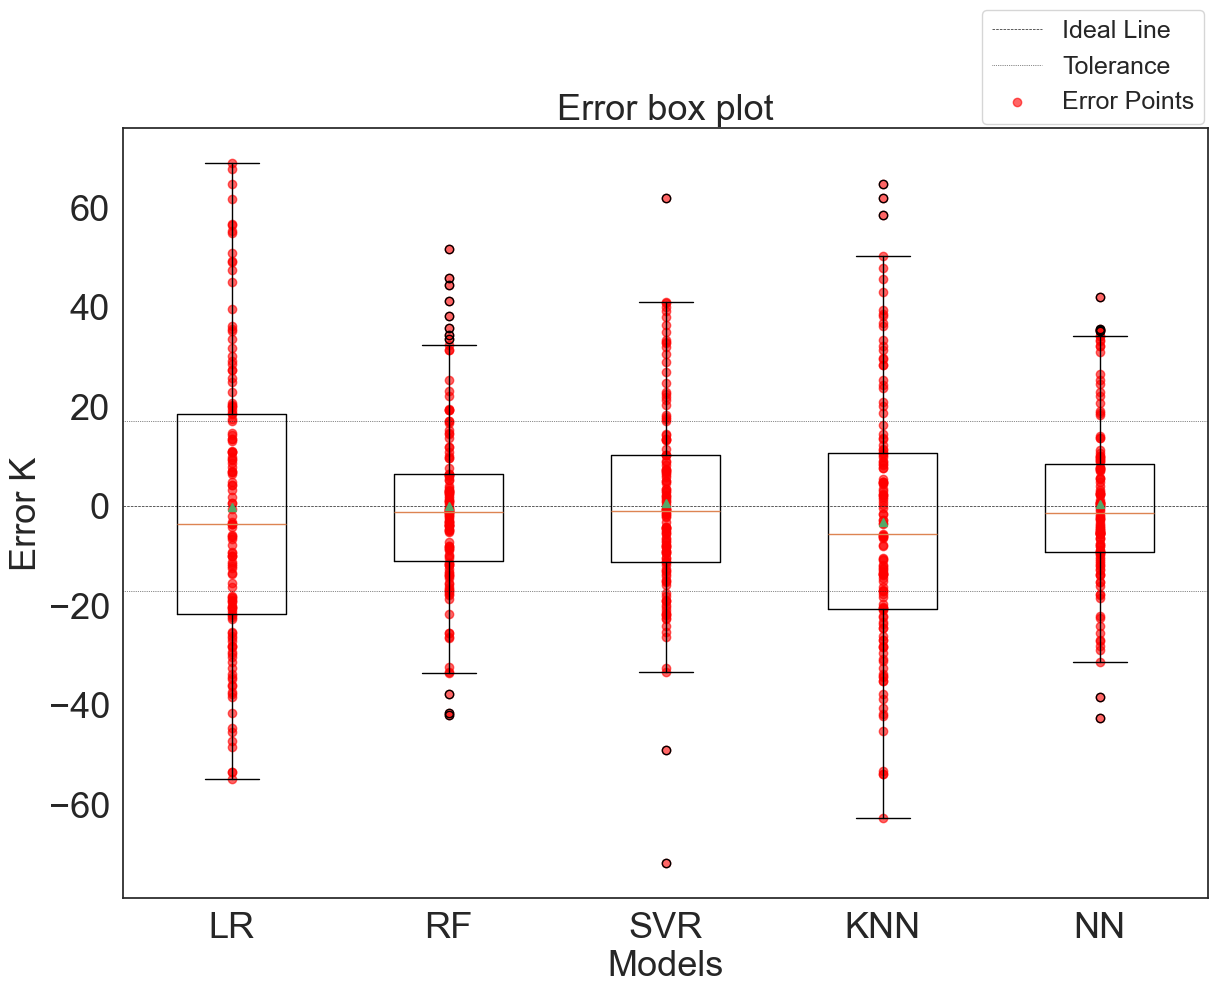

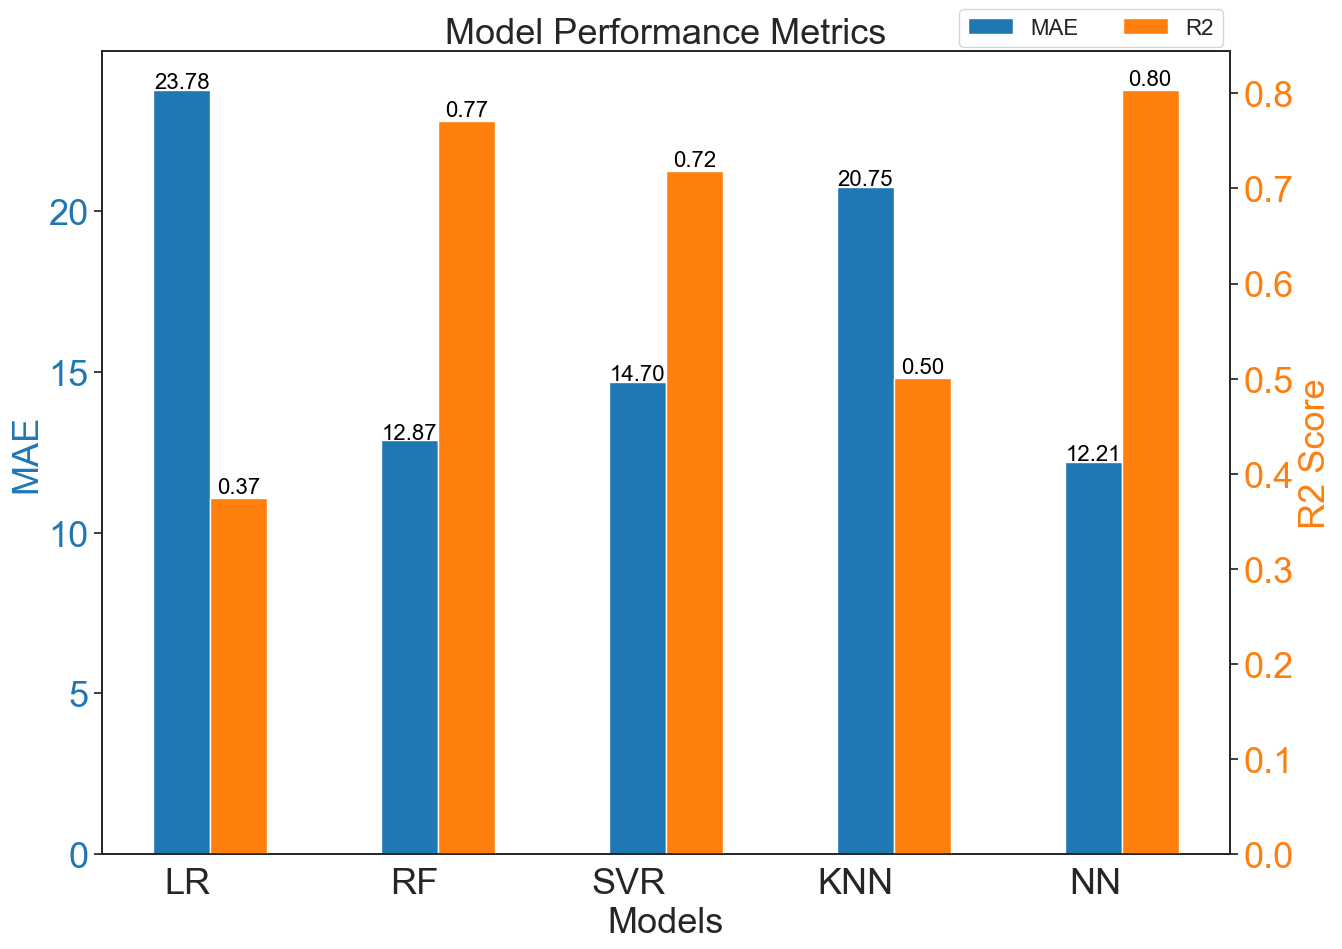

In [57]:
models_alu, best_params_det_alu, best_params_prob_alu, df_alu = pipeline.fit_transform(data_aluminum)

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:712: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_mae = df.pivot_table(


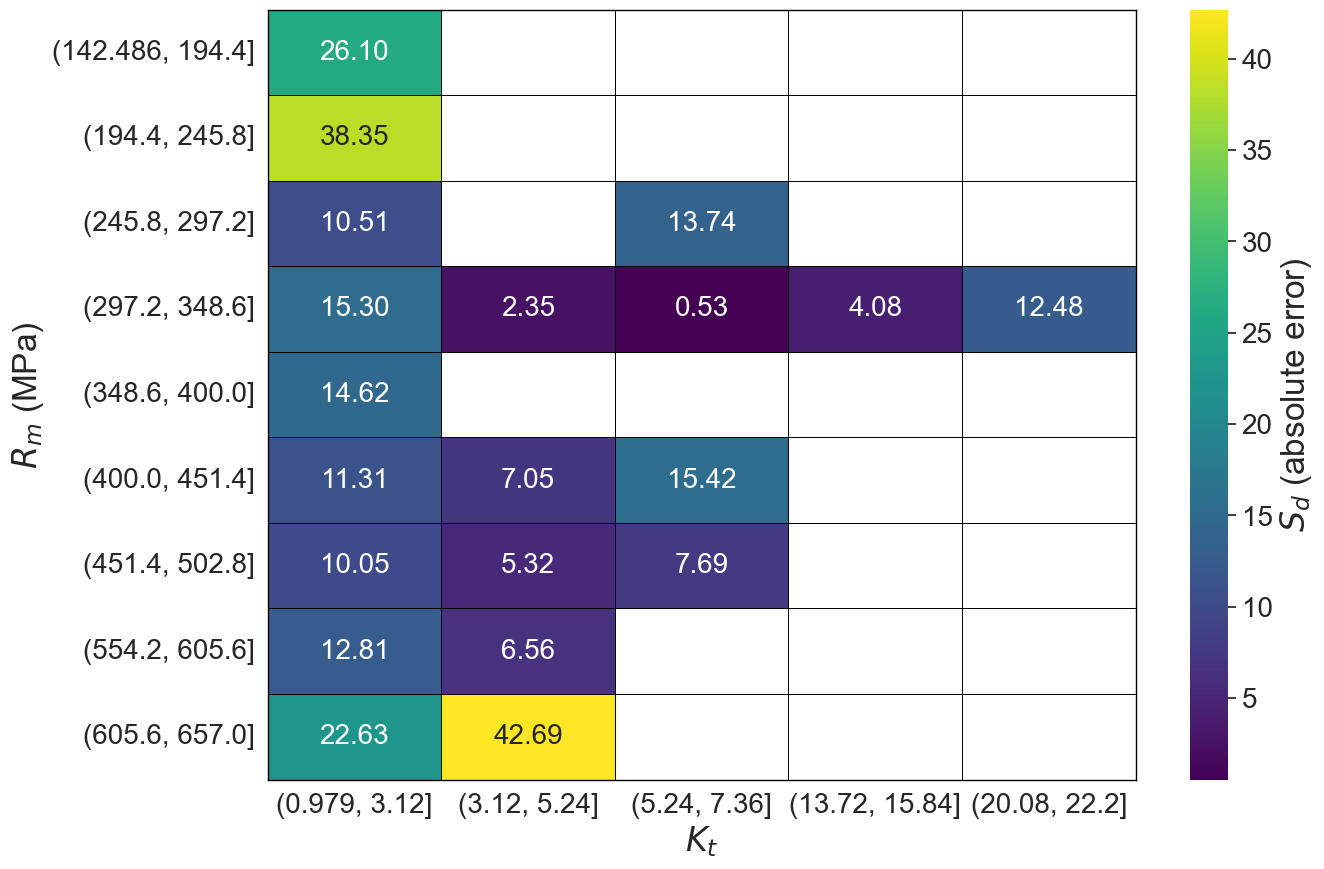

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:788: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_count = df.pivot_table(


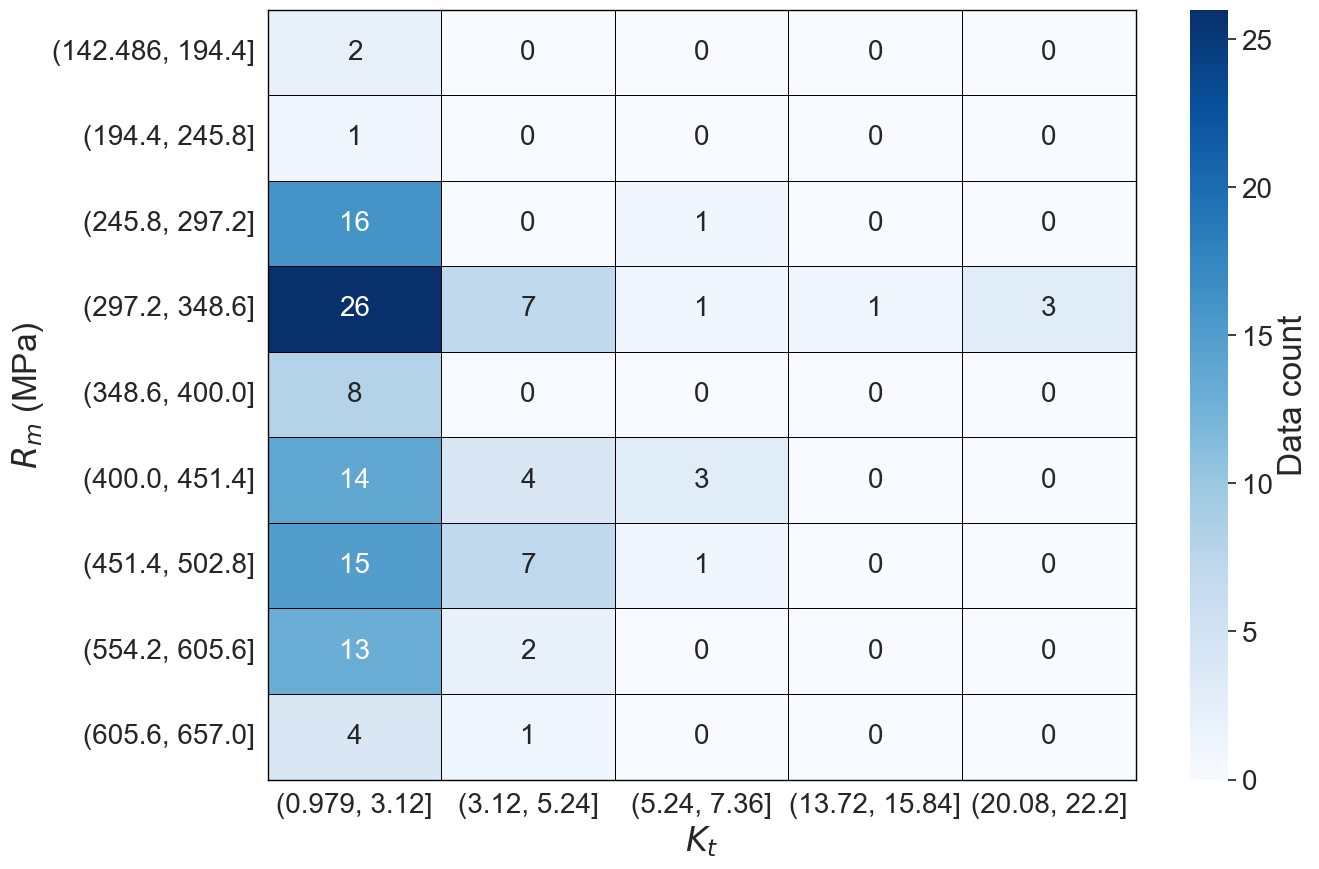

In [7]:
plot_heatmap_mae(df_alu, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='$S_d$ (absolute error)', bin_size=10, cmap="viridis")
plot_heatmap_count(df_alu, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='Data count', bin_size=10, cmap="Blues")
#plot_heatmap(df_alu, 'Rm', 'Kt', 'Pred_NLL_PNN', '$S_d$ (MPa)', '$K_t$', cbar_label='$S_d$ (Standard deviation)', bin_size=10, cmap="viridis")
#plot_scatter_with_categories(df_alu, 's_d', 'Pred_NN', 'L_Type', 'NN')

# Steel

NIMS + RB Internal data with FKM features

In [5]:
data_nims_rb_steel = pd.read_excel(r"data\05_Final Data\NIMS_RB Data Steel with SD_FKM.xlsx")

columns = ['CodeSeries', 'Material', 'Rm', 'Kt', 'G0', 'R_ratio', 'L_Type', 'Stress_Type', 'Control', 'FT_Env_T', 'FT_Env_M', 's_d', 's_d_local', 'SD_FKM_local', 'SD_FKM_nominal']   

data_nims_rb_steel = data_nims_rb_steel[columns]

In [11]:
pipeline = Pipeline([
    ('DataCleaning',DataCleaning(columns_remove_missingvalues, columns_filter, exclude_norunnouts, feature_name, condition_outlierdetection, columns_outlier, detection_method_factor, handling_method)),
    ('DataTransformation',DataTransformation(columns_features, column_target, columns_impute, columns_categorical_dataencoding, dataencoding_method, con_scale, scale_method)),
    ('Visualization', Visualization(columns_visualization, columns_pairplots, metal_name="Steel")),
    ('Data_split', Data_split(columns_features, column_target, train_splitsize, test_splitsize, datasplit_seed, batch_size, custom_datasplit, method, columns_pairplots, columns_contourplots)),
    ('Model training', ML_Models_Train(method, 'S_d (MPa)', custom_datasplit, model_seed, con_hypopt=False, con_deter_models=True, con_prob_models=True, con_descale=True))  
])

Data cleaning step completed
Data transformation step completed


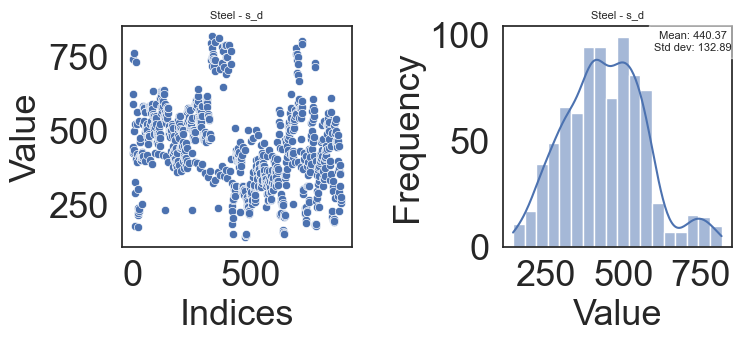

Data visualisation step completed
Number of folds: 5
Train data: 498
Val data: 166
Test data: 166

Fold 1/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepensemble network 7/10...
Training Deepensemble network 8/10...
Training Deepensemble network 9/10...
Training Deepensemble network 10/10...
Training of all ensemble networks completed.
Descaled error
Mean absolute error: {'LR': 44.0178625391371, 'RF': 26.456888877238896, 'SVR': 25.646665084178856, 'KNN':

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepensemble network 7/10...
Training Deepensemble network 8/10...
Training Deepensemble network 9/10...
Training Deepensemble network 10/10...
Training of all ensemble networks completed.
Descaled error
Mean absolute error: {'LR': 44.16078517886979, 'RF': 24.532845145250345, 'SVR': 24.778975015273517, 'KNN': 24.143384240938428, 'NN': 28.551909044340523}
Mean squared error: {'LR': 4206.9425755447055, 'RF': 1476.5789610046838, 'SVR': 1553.7483014470542, 'KNN': 1749.036876951144, 'NN': 1737.8736452367934}


c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 25.15236144207319, 'RFCI': 24.635127535963957, 'PNN': 23.40013851237315, 'DeepEnsemble': 24.41439388021935}
NLL: {'GPR': 8.35444508022614, 'RFCI': 8.82694241368669, 'PNN': 3.806860073487239, 'DeepEnsemble': 3.9223615851030638}
Mean Std: {'GPR': 8.951105303601949, 'RFCI': 11.602828012766226, 'PNN': 37.09484124496467, 'DeepEnsemble': 43.01395918298211}

Fold 4/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepensemb

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 22.51122508876577, 'RFCI': 24.479007577726005, 'PNN': 25.29865173887484, 'DeepEnsemble': 24.887267889864788}
NLL: {'GPR': 8.141584103599817, 'RFCI': 6.746125409216824, 'PNN': 3.8943961179007704, 'DeepEnsemble': 3.9480969700018567}
Mean Std: {'GPR': 9.984311307030886, 'RFCI': 11.867820336169784, 'PNN': 37.67783744664078, 'DeepEnsemble': 42.30119245332884}

Fold 5/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepen

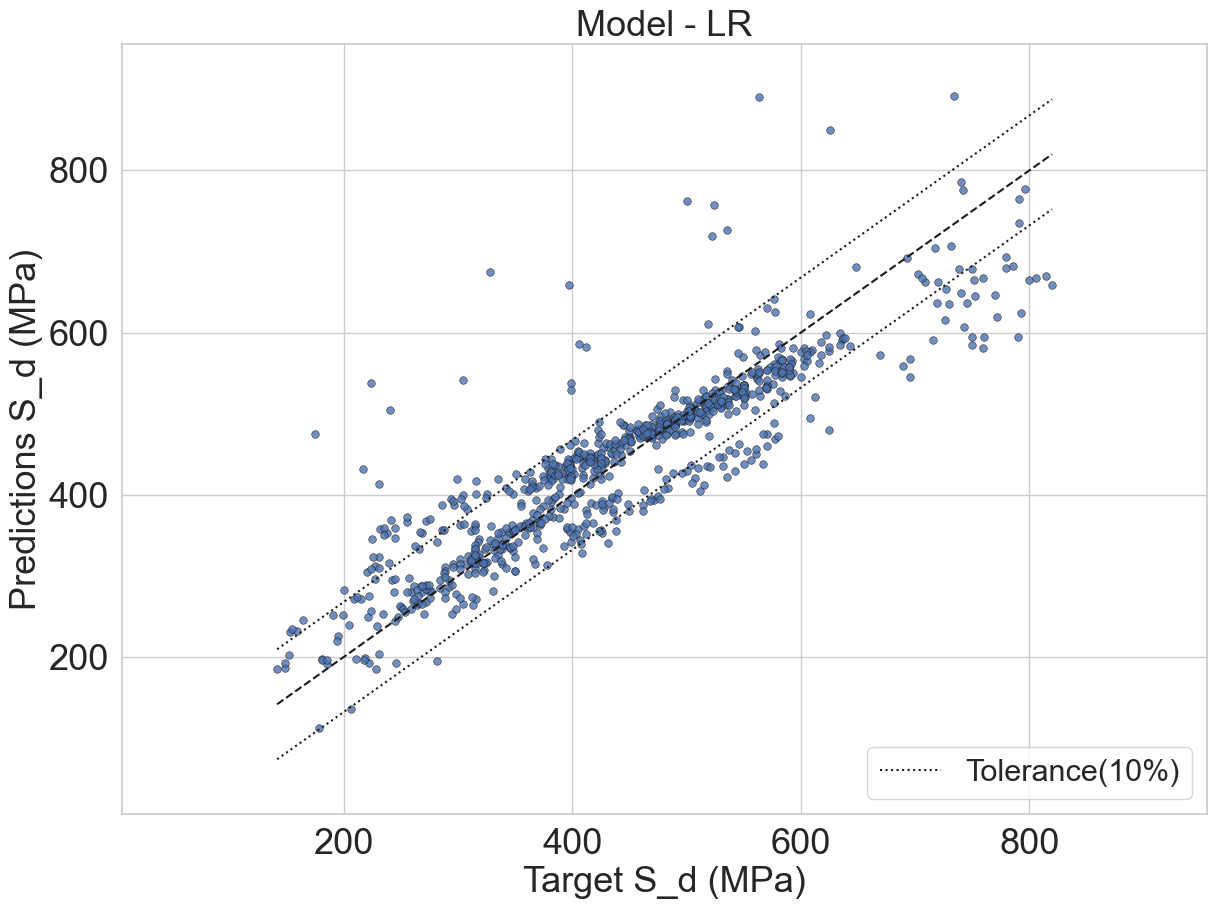

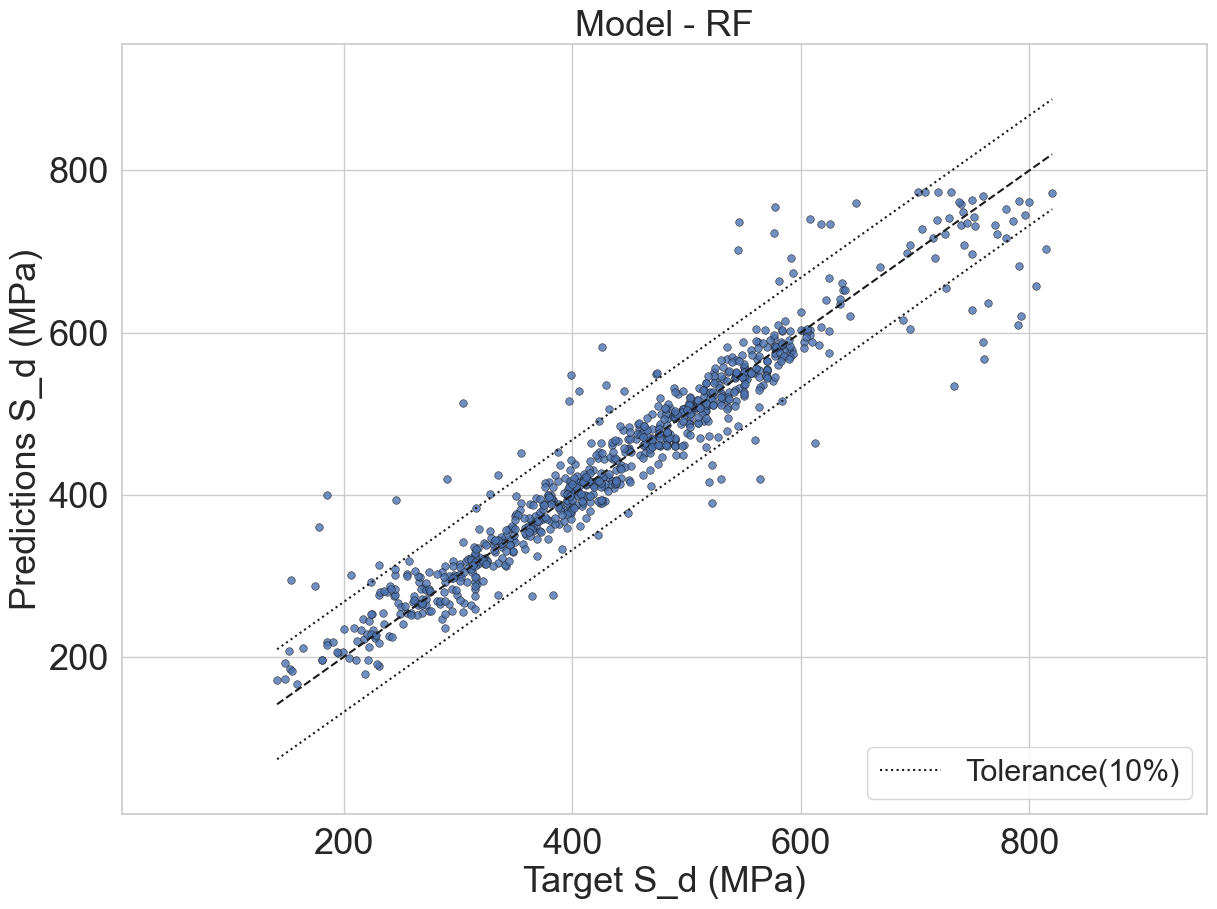

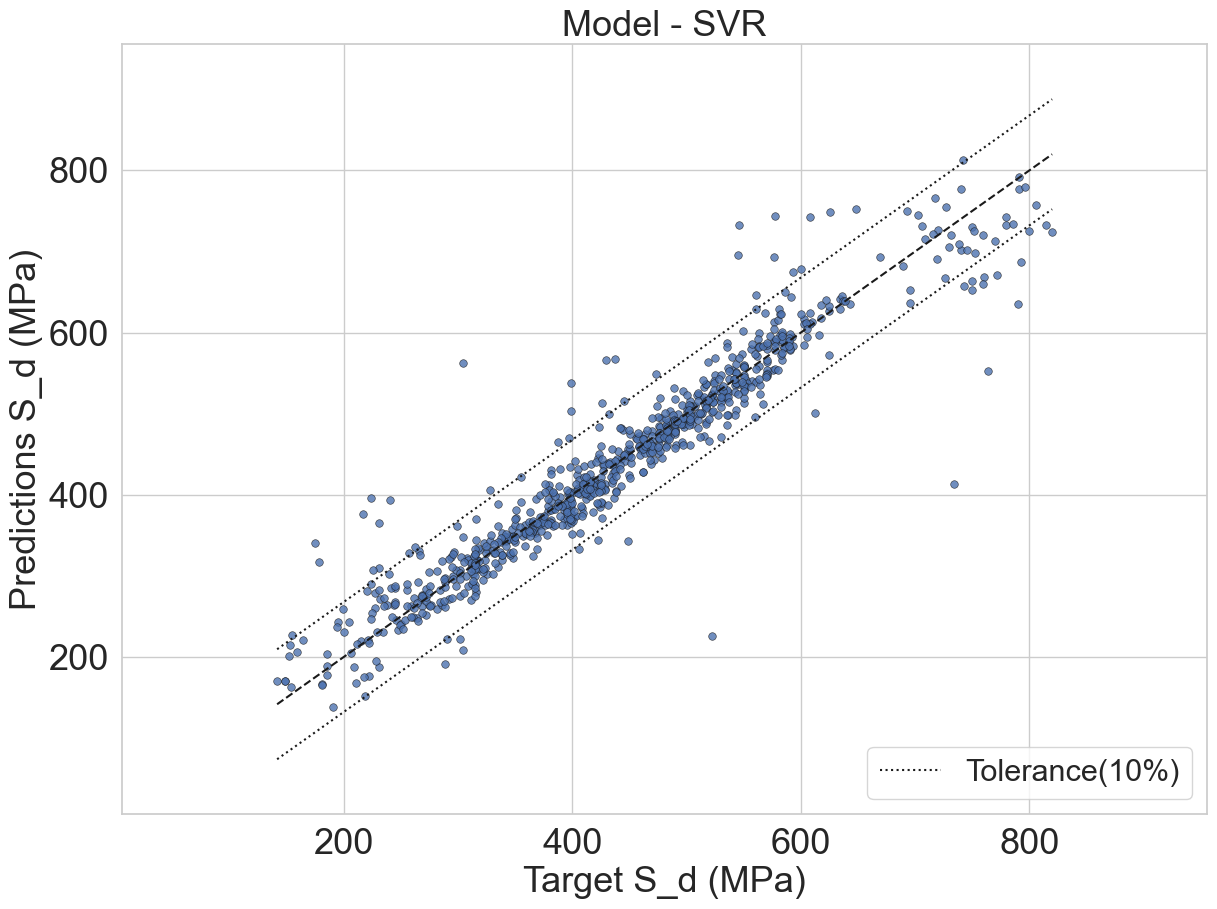

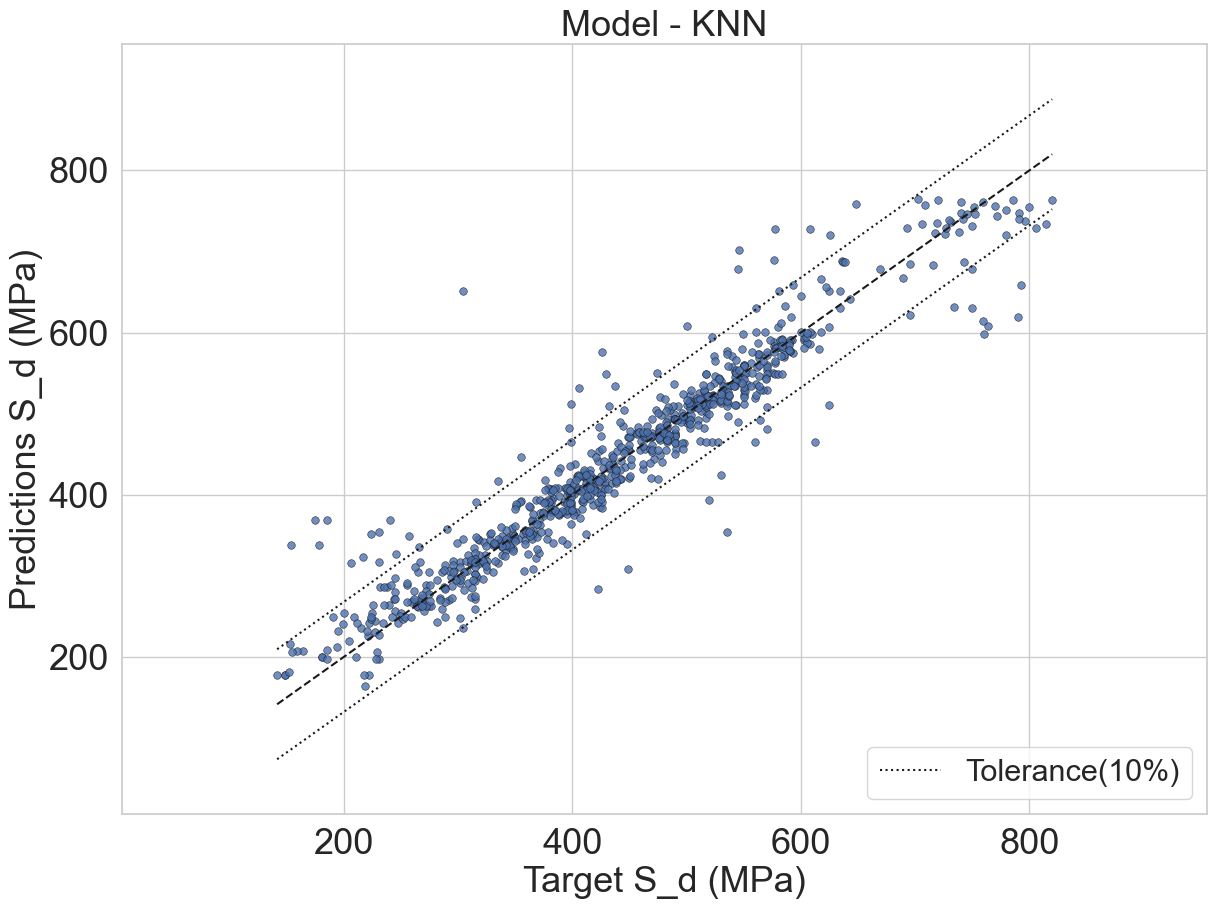

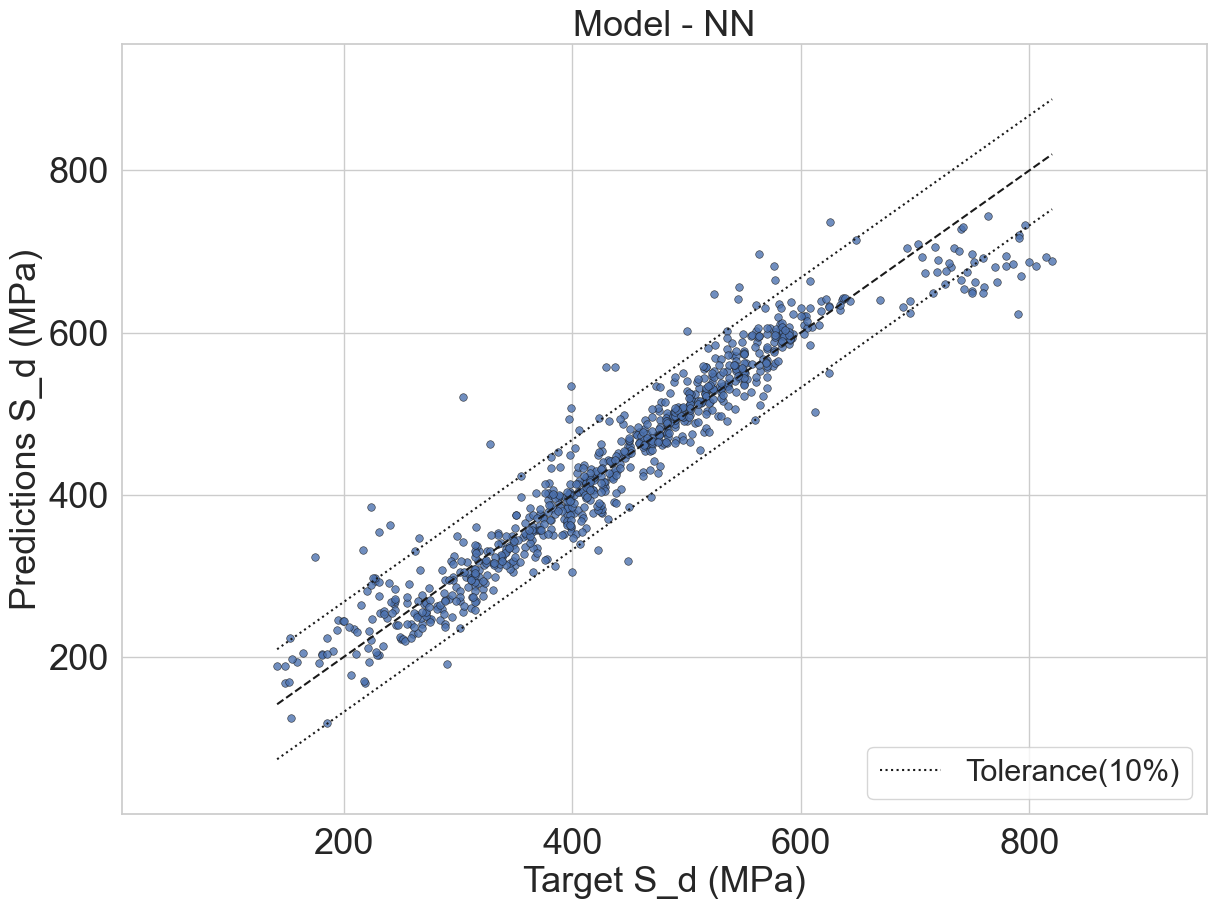

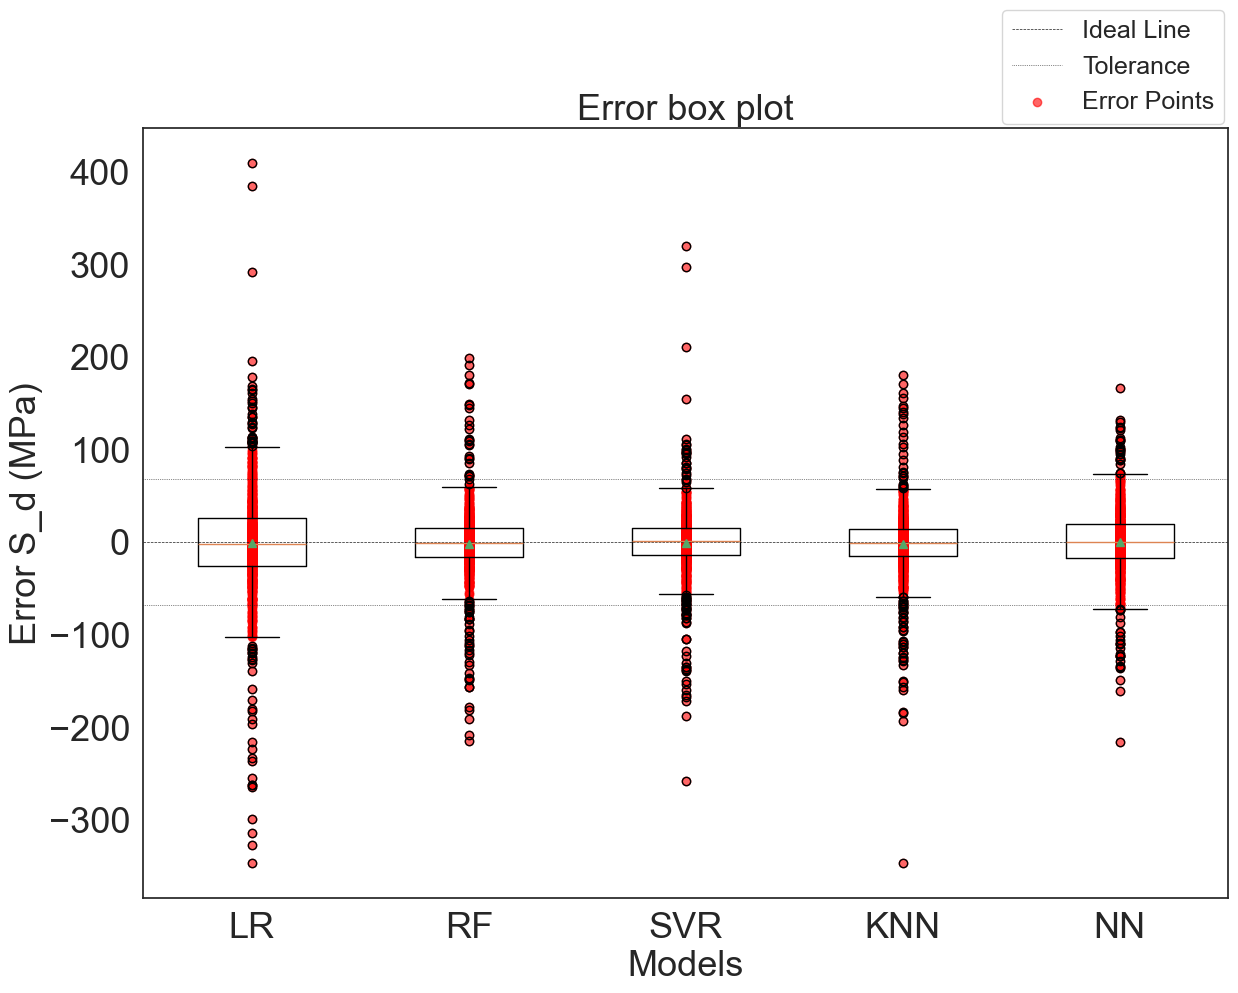

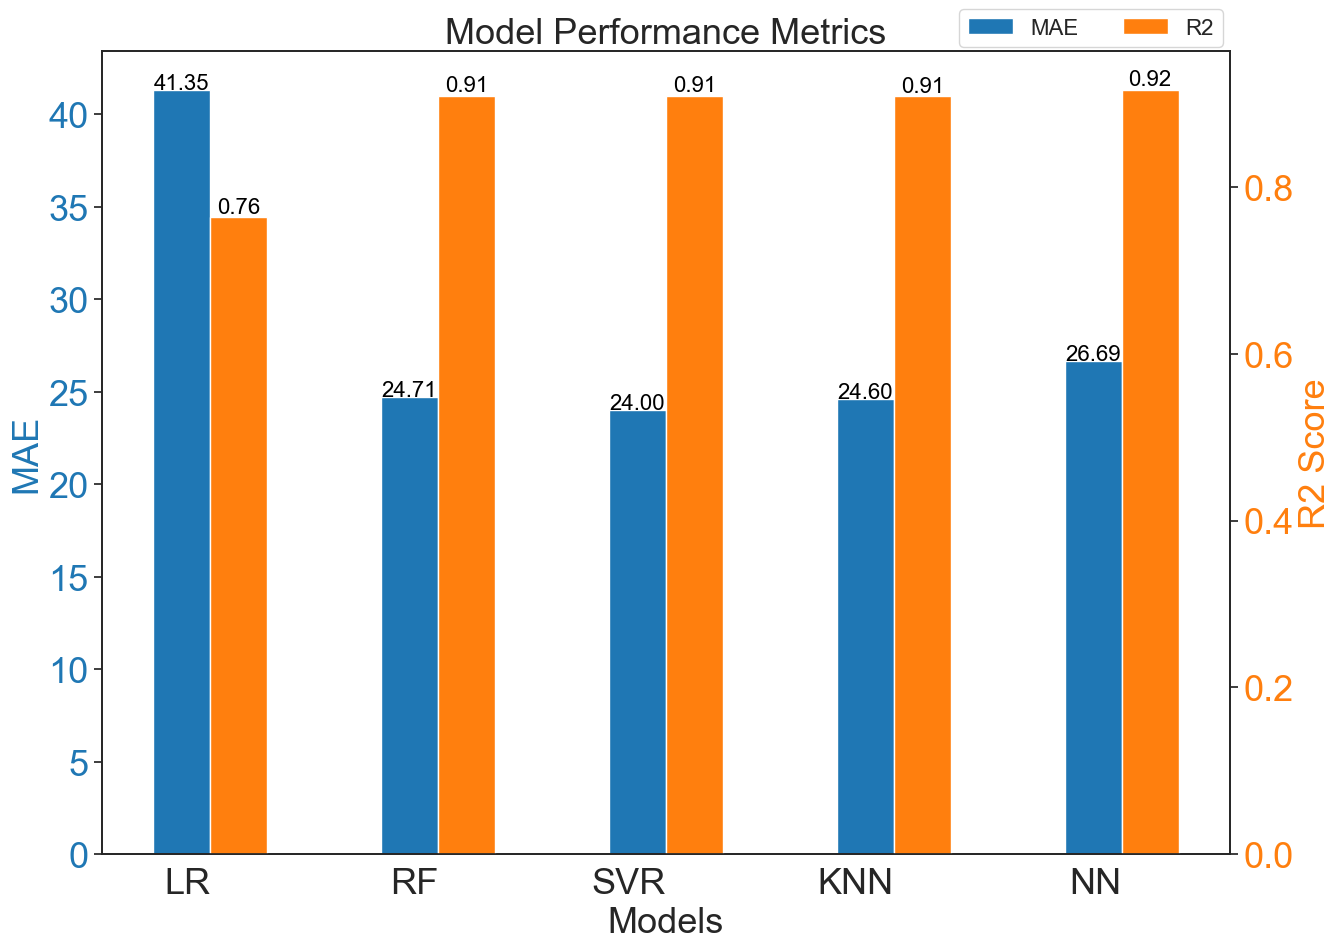

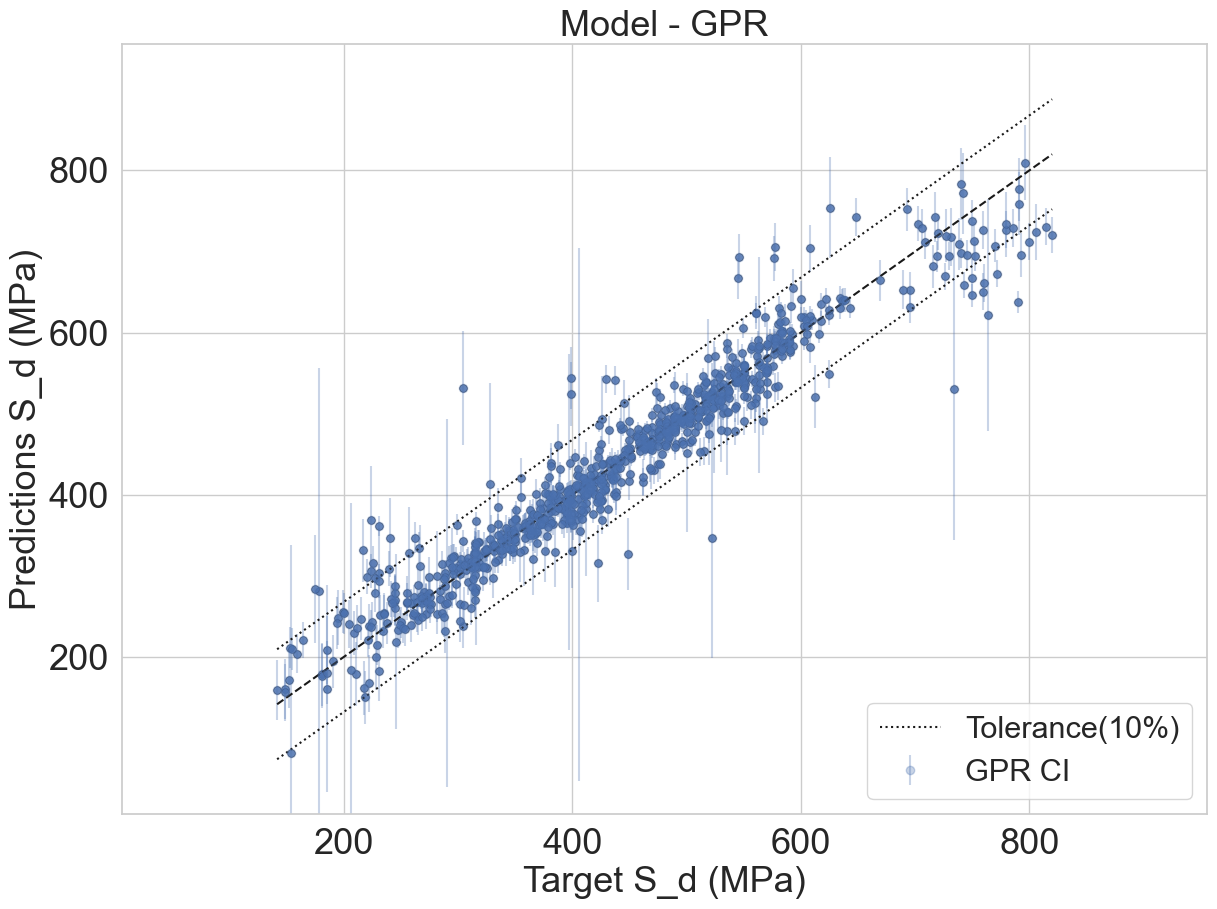

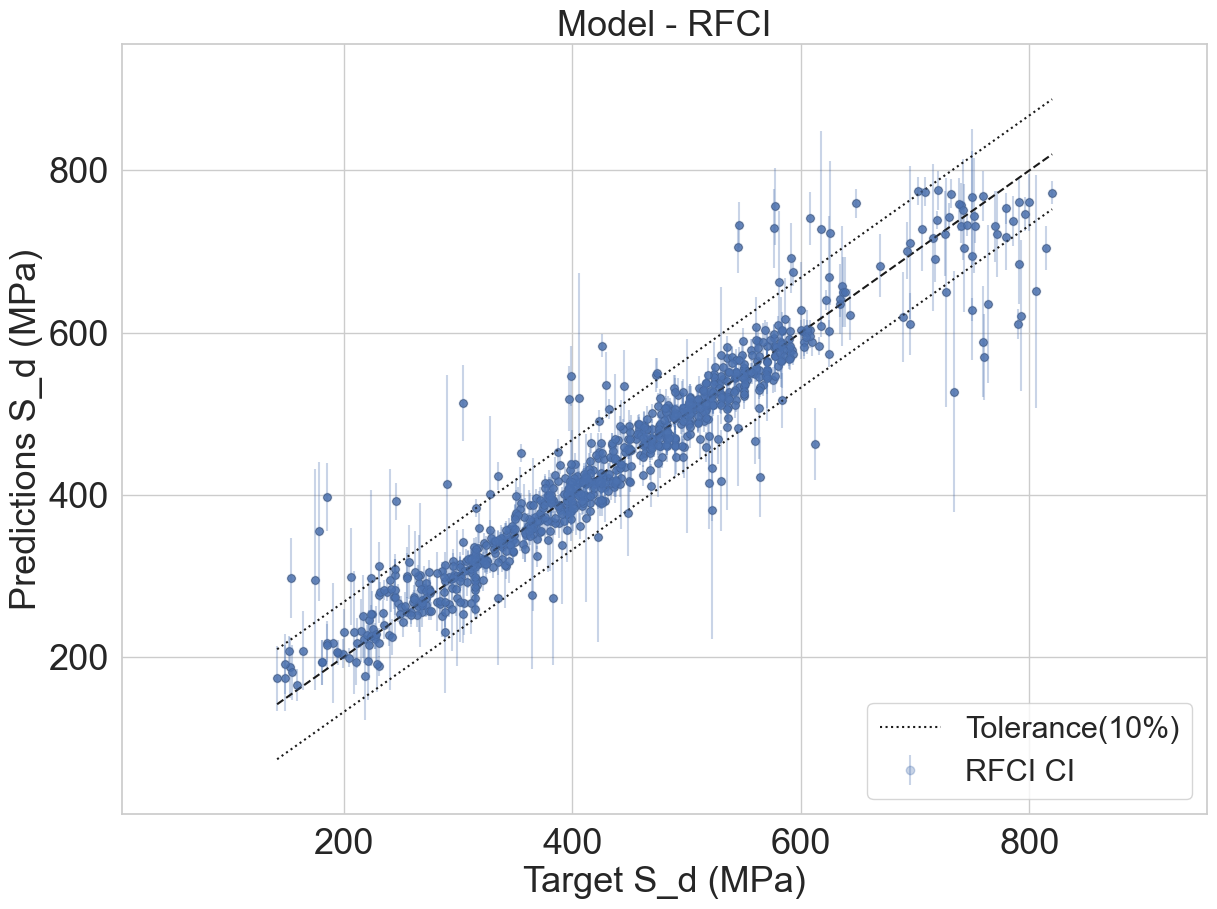

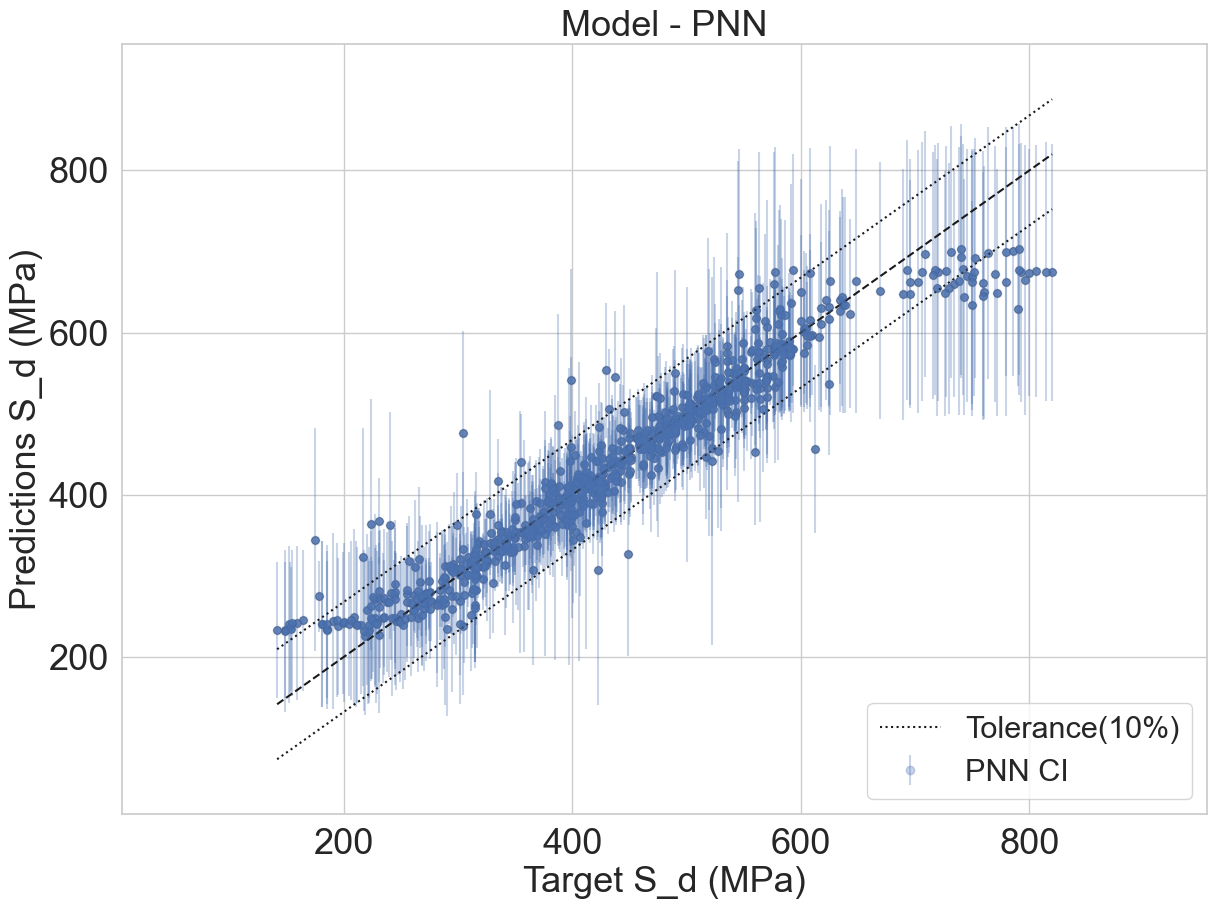

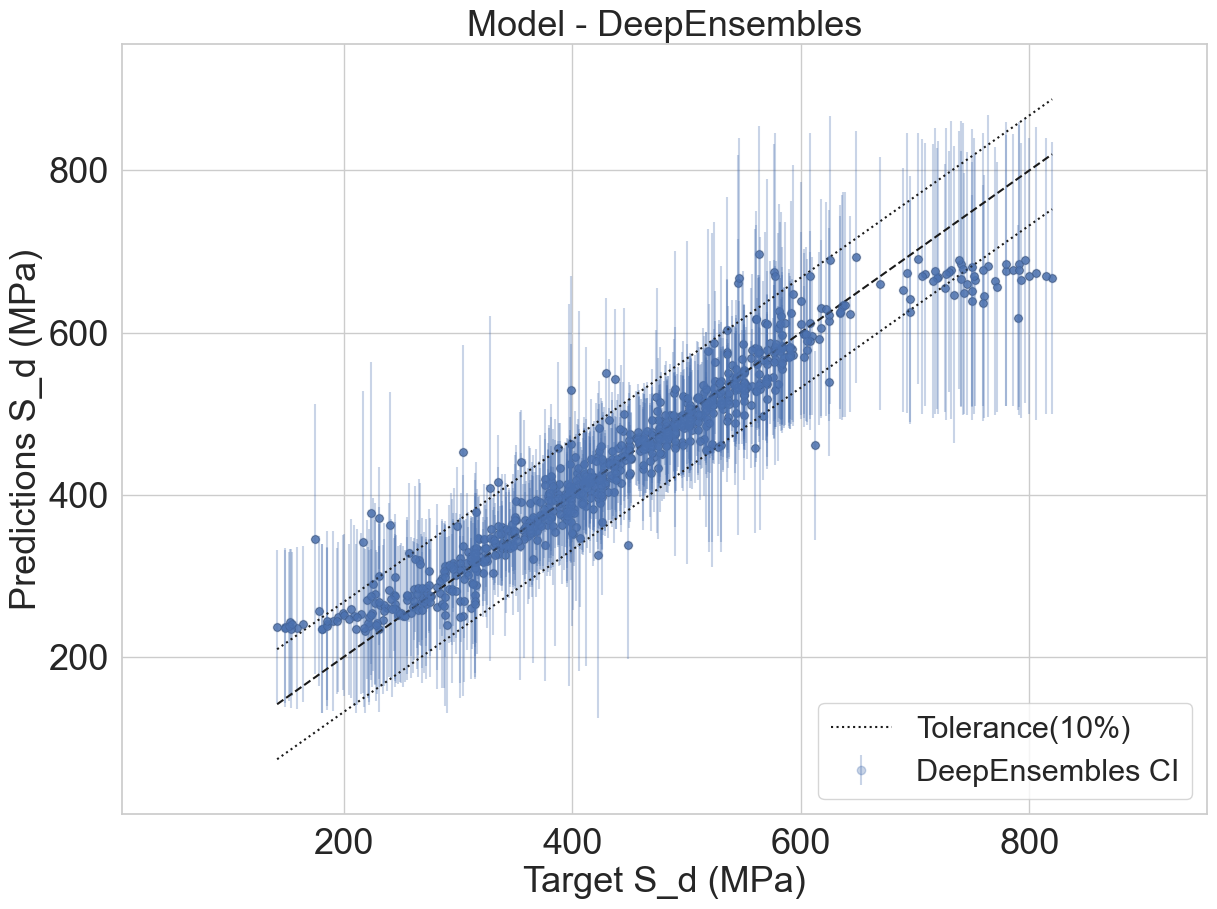

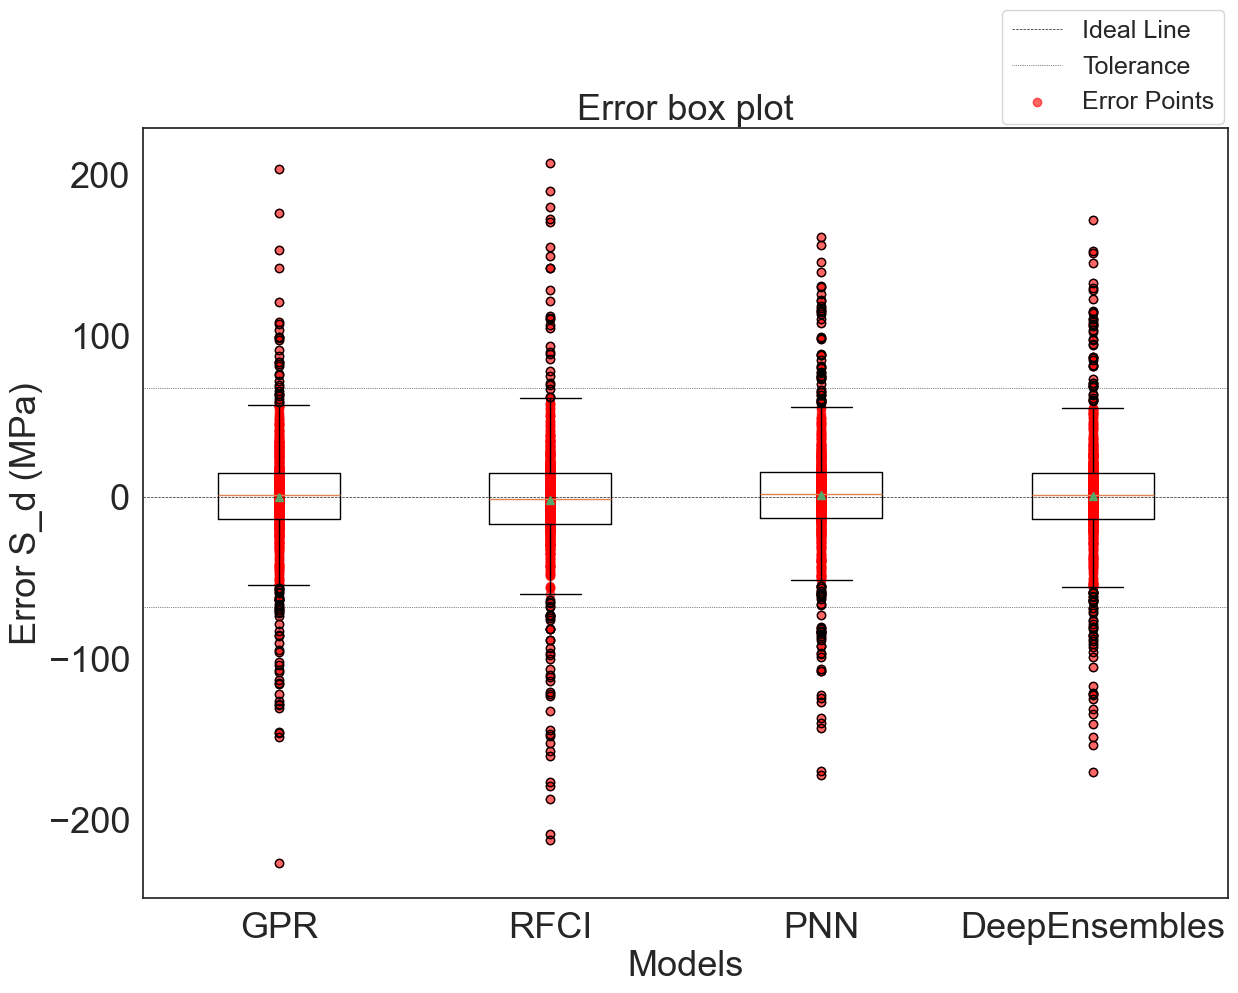

<Figure size 1400x1000 with 0 Axes>

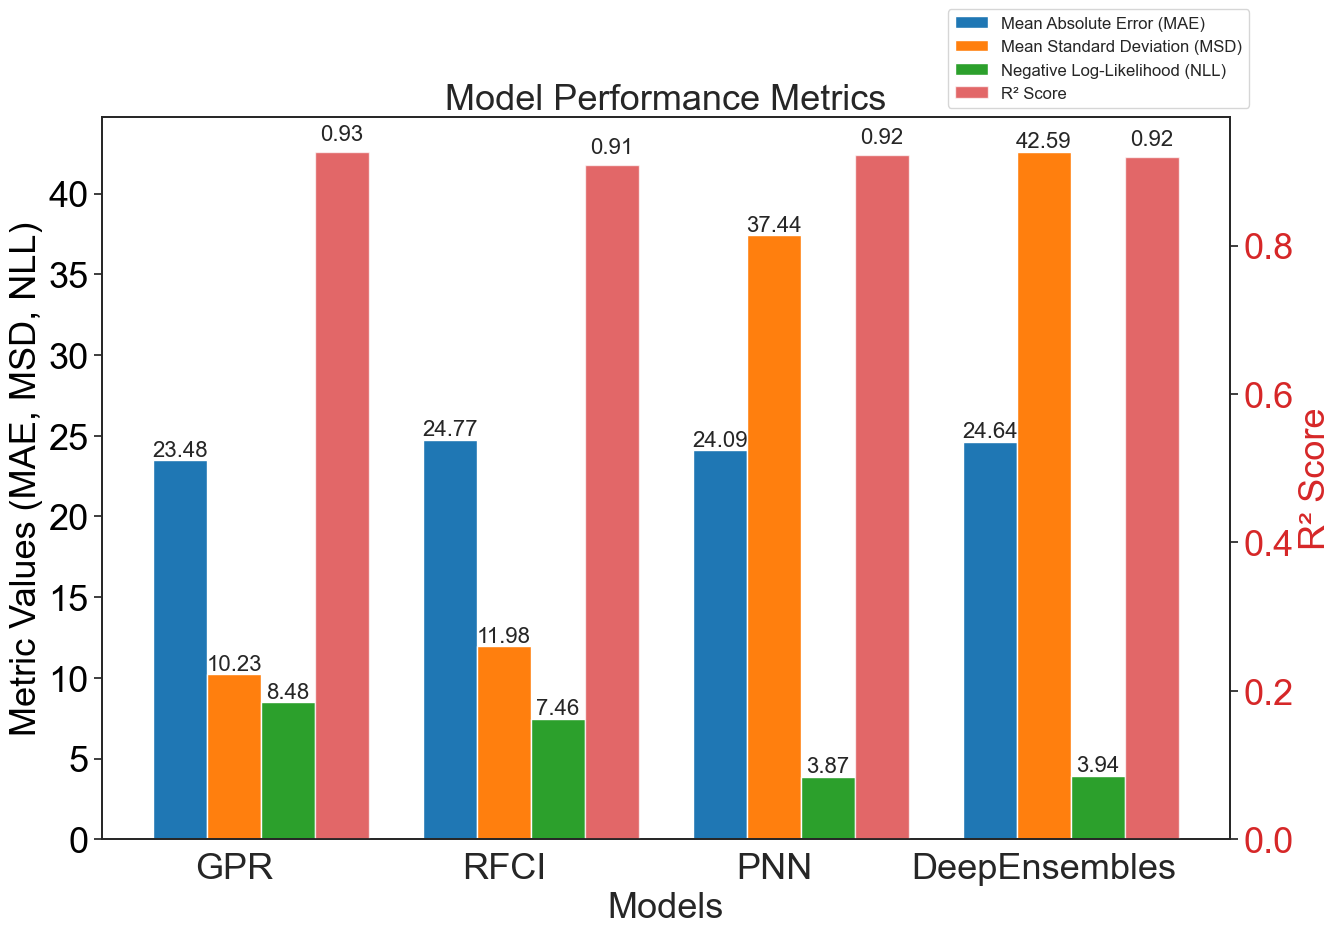

In [12]:
models_steel, best_params_det_steel, best_params_prob_steel, df_steel = pipeline.fit_transform(data_nims_rb_steel)

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:712: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_mae = df.pivot_table(


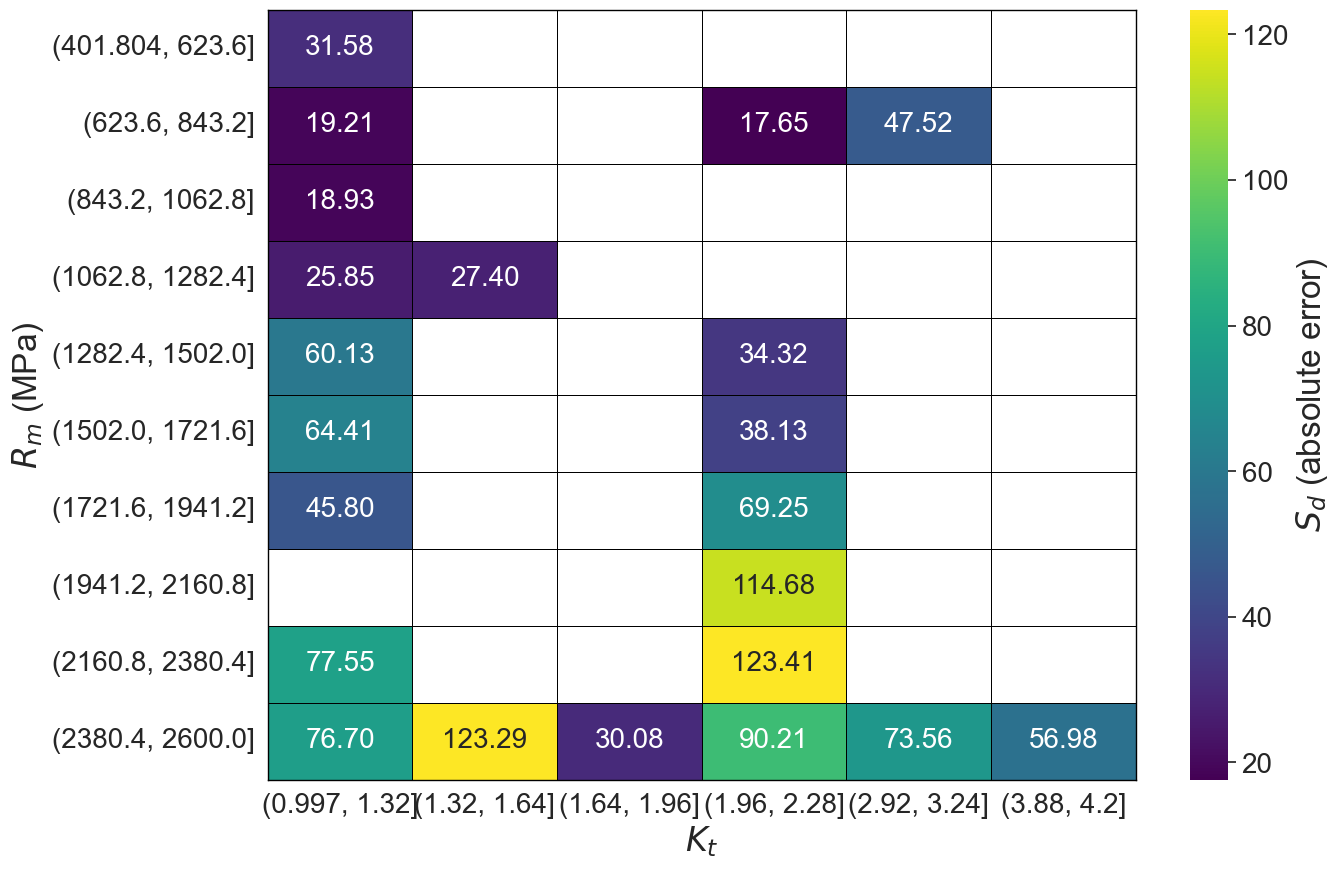

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:788: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_count = df.pivot_table(


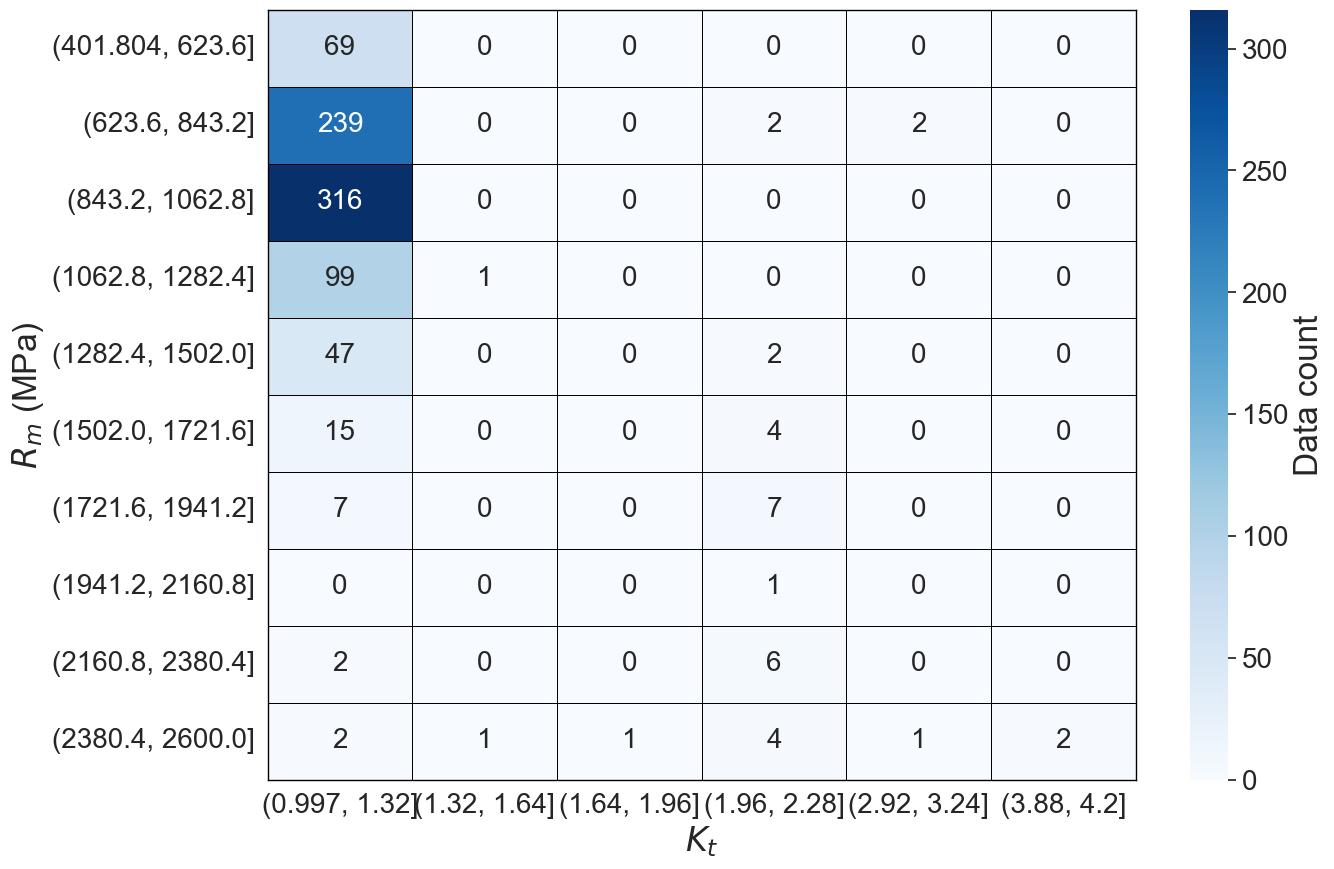

In [14]:
plot_heatmap_mae(df_steel, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='$S_d$ (absolute error)', bin_size=10, cmap="viridis")
plot_heatmap_count(df_steel, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='Data count', bin_size=10, cmap="Blues")

Extended dataset with notched specimens 
(NIMS + RB Internal + DaBef + JSMS)

In [7]:
data_jsms_steel = pd.read_excel(r"data\05_Final Data\JSMS Data Steel.xlsx")
data_nims_rb_dabef_steel = pd.read_excel(r"data\05_Final Data\NIMS_RB_DaBef Data Steel.xlsx")

columns = ['CodeSeries', 'Material', 'Rm', 'Kt', 'G0', 'R_ratio', 'L_Type', 'Stress_Type', 'Control', 'FT_Env_T', 'FT_Env_M', 's_d', 's_d_local', 'SD_FKM_local', 'SD_FKM_nominal']

data_jsms_steel = data_jsms_steel[columns]
data_nims_rb_dabef_steel = data_nims_rb_dabef_steel[columns]

data_steel_nims_dabef_jsms = pd.concat((data_nims_rb_dabef_steel, data_jsms_steel), axis=0, ignore_index=True) 

In [17]:
pipeline = Pipeline([
    ('DataCleaning',DataCleaning(columns_remove_missingvalues, columns_filter, exclude_norunnouts, feature_name, condition_outlierdetection, columns_outlier, detection_method_factor, handling_method)),
    ('DataTransformation',DataTransformation(columns_features, column_target, columns_impute, columns_categorical_dataencoding, dataencoding_method, con_scale, scale_method)),
    ('Visualization', Visualization(columns_visualization, columns_pairplots, metal_name="Steel")),
    ('Data_split', Data_split(columns_features, column_target, train_splitsize, test_splitsize, datasplit_seed, batch_size, custom_datasplit, method, columns_pairplots, columns_contourplots)),
    ('Model training', ML_Models_Train(method, 'S_d (MPa)', custom_datasplit, model_seed, con_hypopt=False, con_deter_models=True, con_prob_models=True, con_descale=True))  
])

Data cleaning step completed
Data transformation step completed


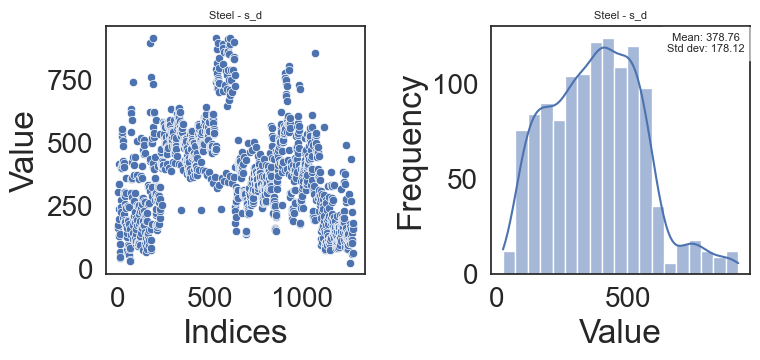

Data visualisation step completed
Number of folds: 5
Train data: 738
Val data: 246
Test data: 246

Fold 1/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepensemble network 7/10...
Training Deepensemble network 8/10...
Training Deepensemble network 9/10...
Training Deepensemble network 10/10...
Training of all ensemble networks completed.
Descaled error
Mean absolute error: {'LR': 73.81877752198999, 'RF': 30.190981618647868, 'SVR': 34.360047126668526, 'KNN'

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 30.298581653687403, 'RFCI': 30.28758695422064, 'PNN': 33.66813041210466, 'DeepEnsemble': 33.85541842300003}
NLL: {'GPR': 14.095884385943073, 'RFCI': 6.542000591549634, 'PNN': 4.2389101380150125, 'DeepEnsemble': 4.325319510178039}
Mean Std: {'GPR': 14.019488005428267, 'RFCI': 16.299510517970933, 'PNN': 54.66712500597409, 'DeepEnsemble': 61.31230267993394}

Fold 2/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepen

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 31.1108881729241, 'RFCI': 34.05137342063526, 'PNN': 33.30312850194021, 'DeepEnsemble': 32.222534079916485}
NLL: {'GPR': 10.499059824872663, 'RFCI': 6.498301315032818, 'PNN': 4.211805939541936, 'DeepEnsemble': 4.282074531469354}
Mean Std: {'GPR': 14.826375101237558, 'RFCI': 17.418905853731577, 'PNN': 51.99574971716019, 'DeepEnsemble': 60.27285897163351}

Fold 3/5
Training of Linear Regression model completed
Training of Random forest model completed
Training of SVR model completed
Training of KNN model completed
Training of Neural network completed
Training of Gaussian Process Regressor completed
Training of Random Forest with Jackknife model completed
Training of Probabilistic Neural network completed
Training Deepensemble network 1/10...
Training Deepensemble network 2/10...
Training Deepensemble network 3/10...
Training Deepensemble network 4/10...
Training Deepensemble network 5/10...
Training Deepensemble network 6/10...
Training Deepense

c:\USERS\NGC2KOR\DOCUMENTS\MASTERTHESIS_ANGADI\.ML_FATIGUE_ASSESSMENT\Lib\site-packages\forestci\calibration.py:100: UserWarning: Fitting the empirical bayes prior failed with message Desired error not necessarily achieved due to precision loss..
  warnings.warn("Fitting the empirical bayes prior failed with message %s." % res.message)


Descaled error
Mean absolute error: {'GPR': 33.30288139276088, 'RFCI': 31.184445629965705, 'PNN': 36.54550514649495, 'DeepEnsemble': 35.6668149806525}
NLL: {'GPR': 25.718262897089826, 'RFCI': 5.961465546878745, 'PNN': 4.356277577680643, 'DeepEnsemble': 4.4007294524126745}
Mean Std: {'GPR': 16.05195575704231, 'RFCI': 15.468690013110649, 'PNN': 51.467459281304485, 'DeepEnsemble': 60.35489498565611}


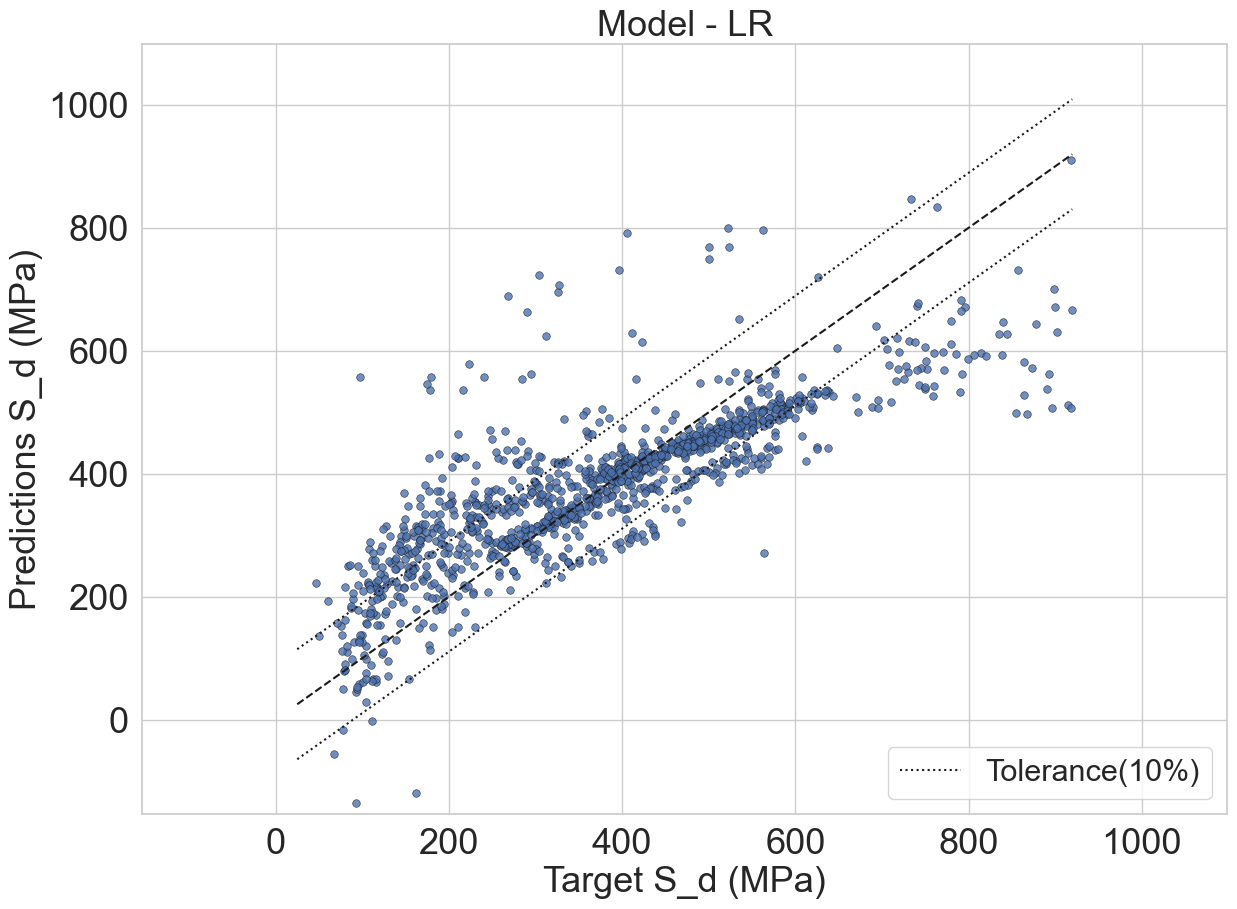

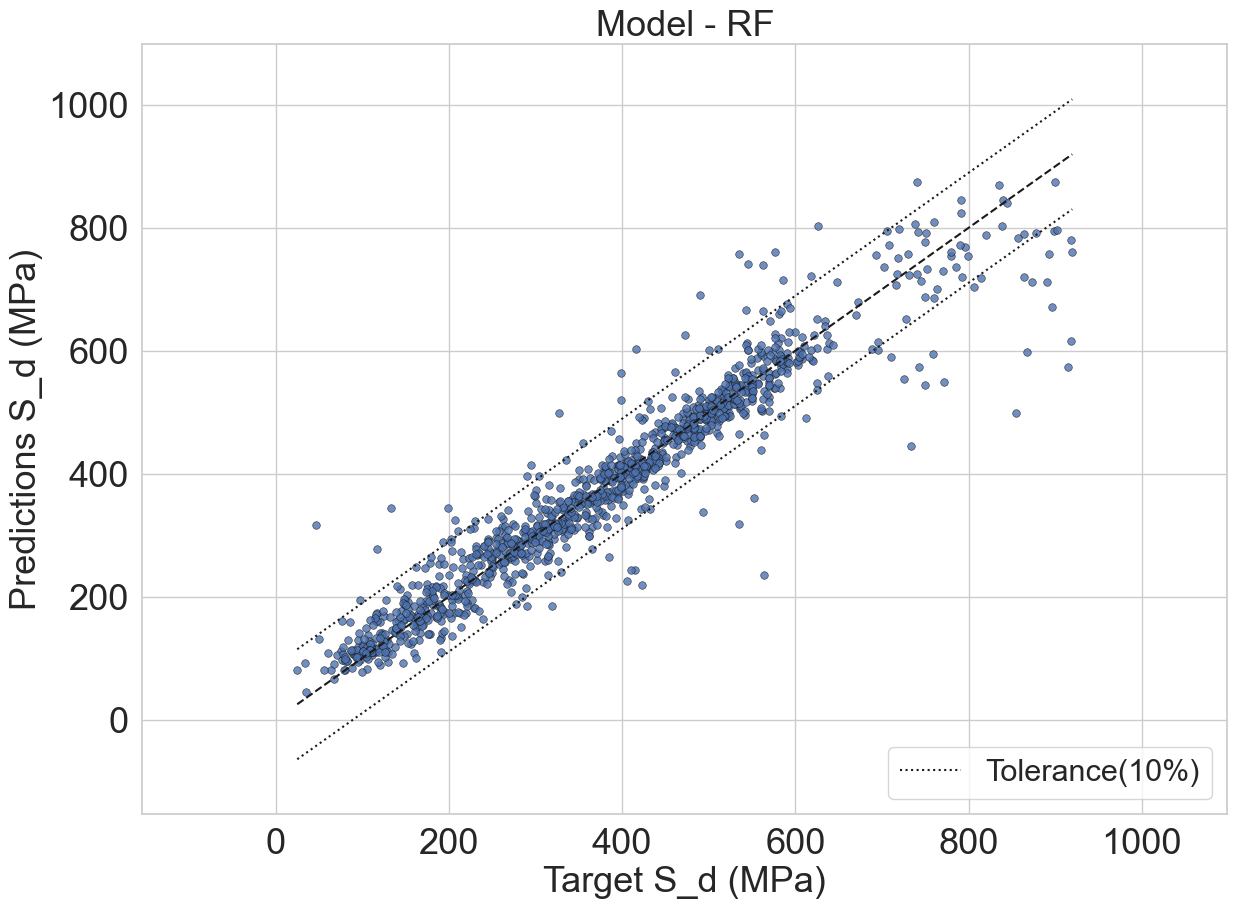

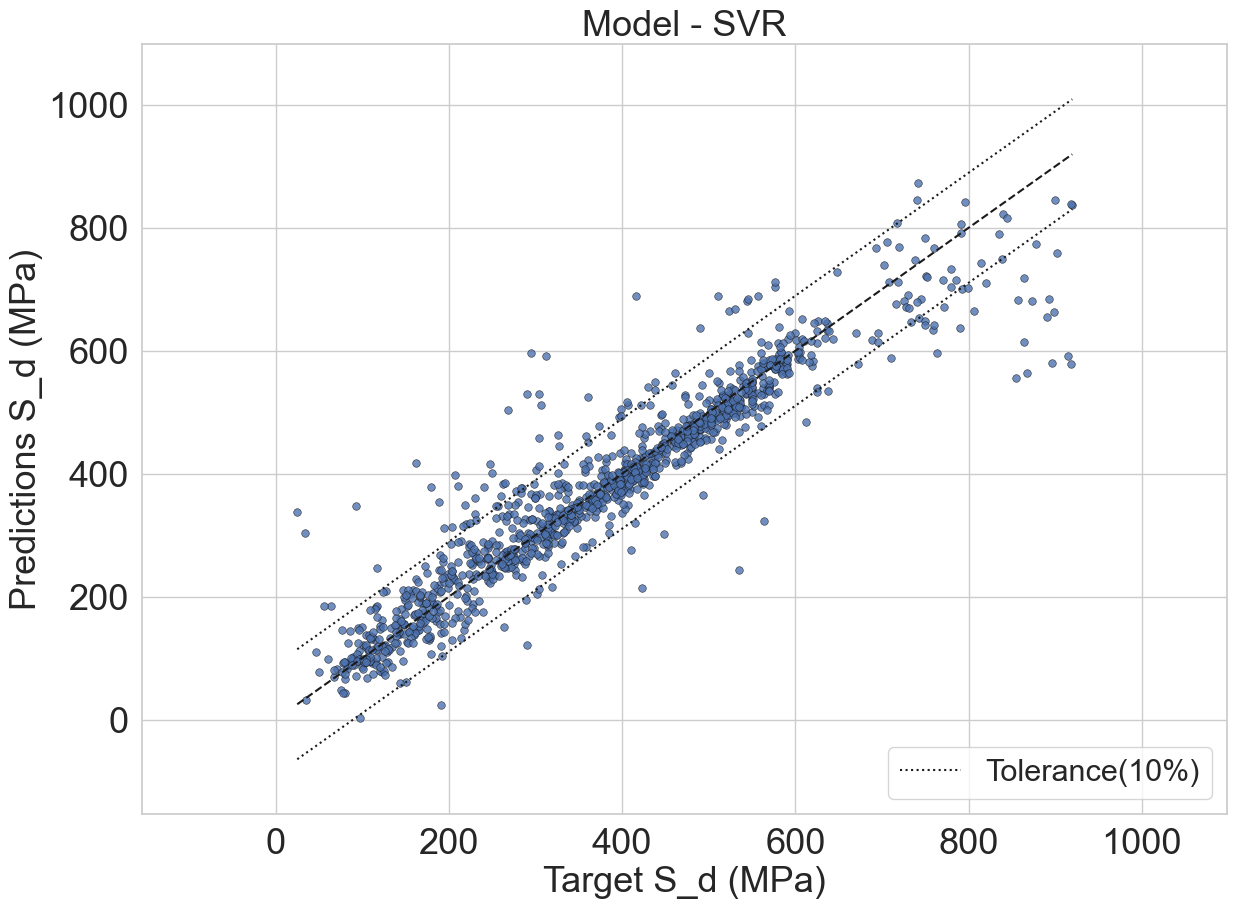

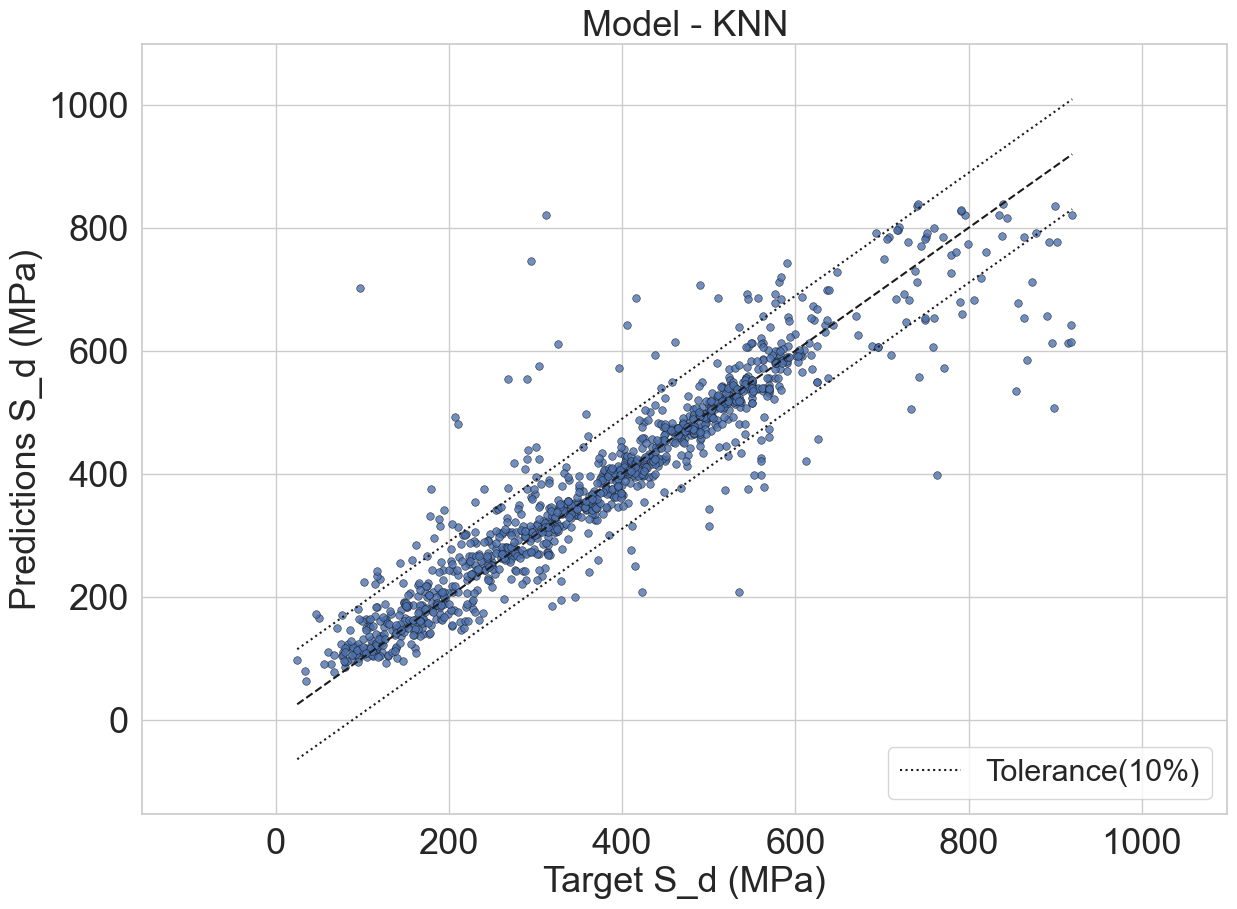

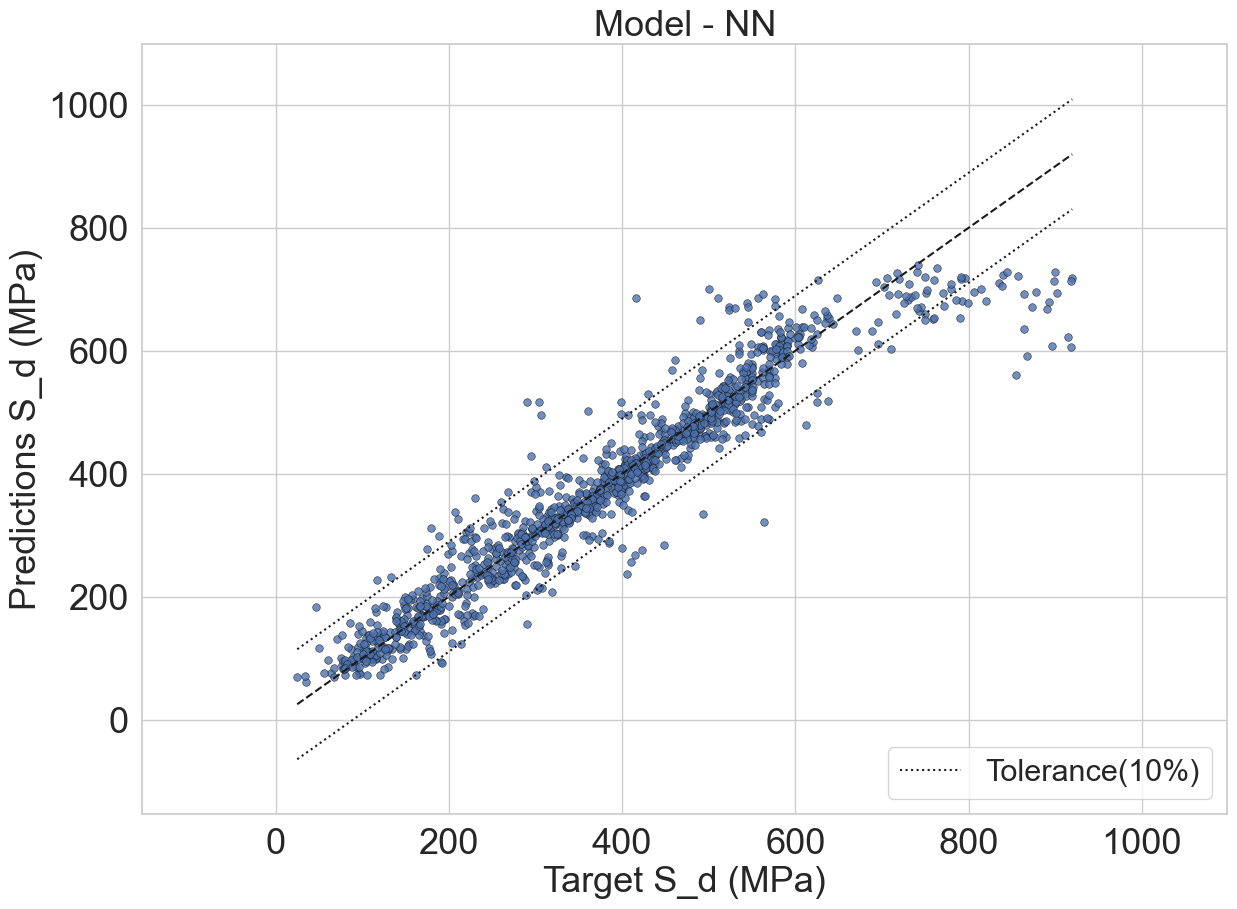

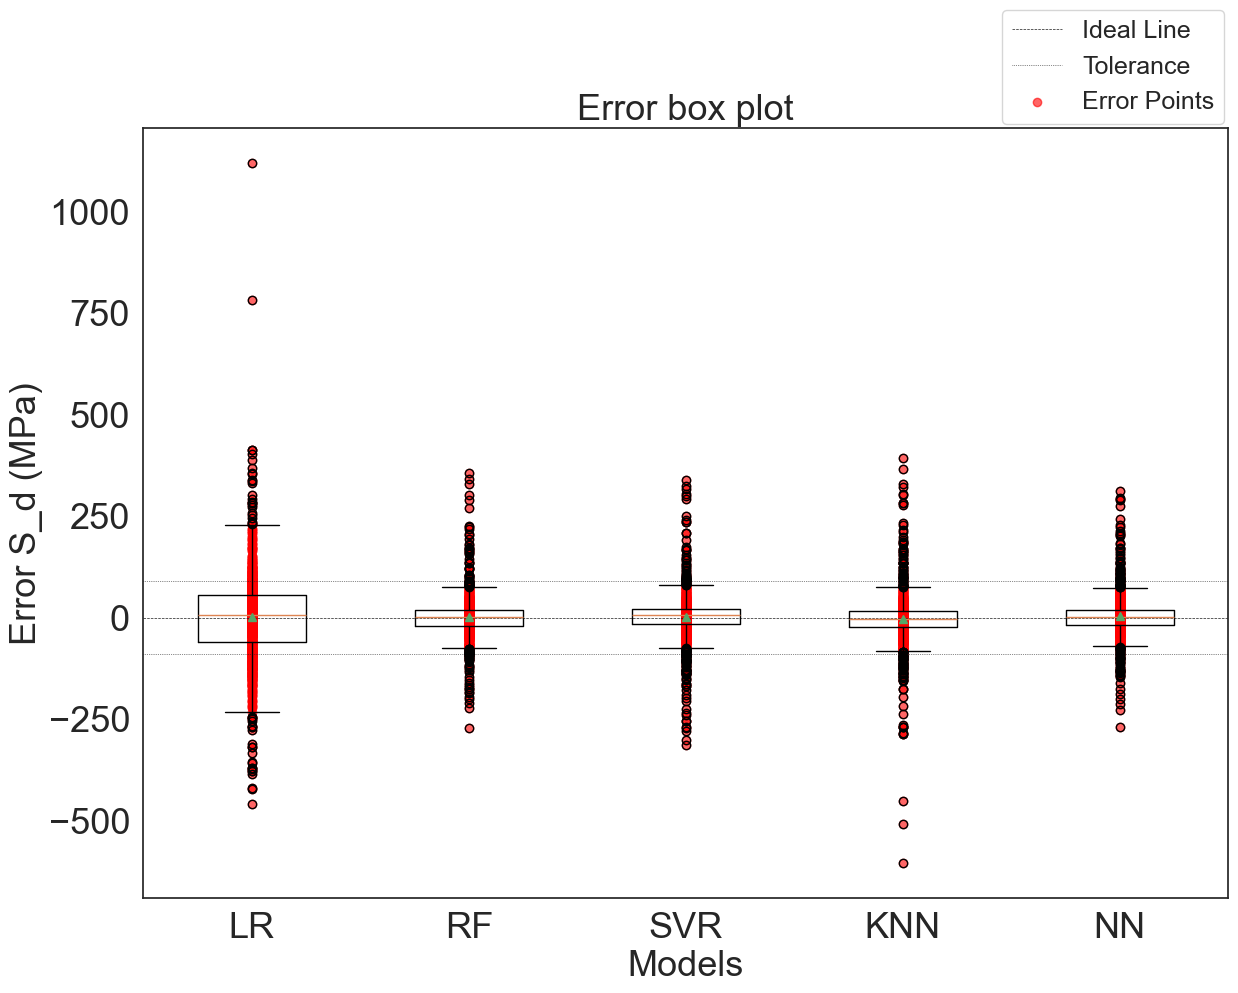

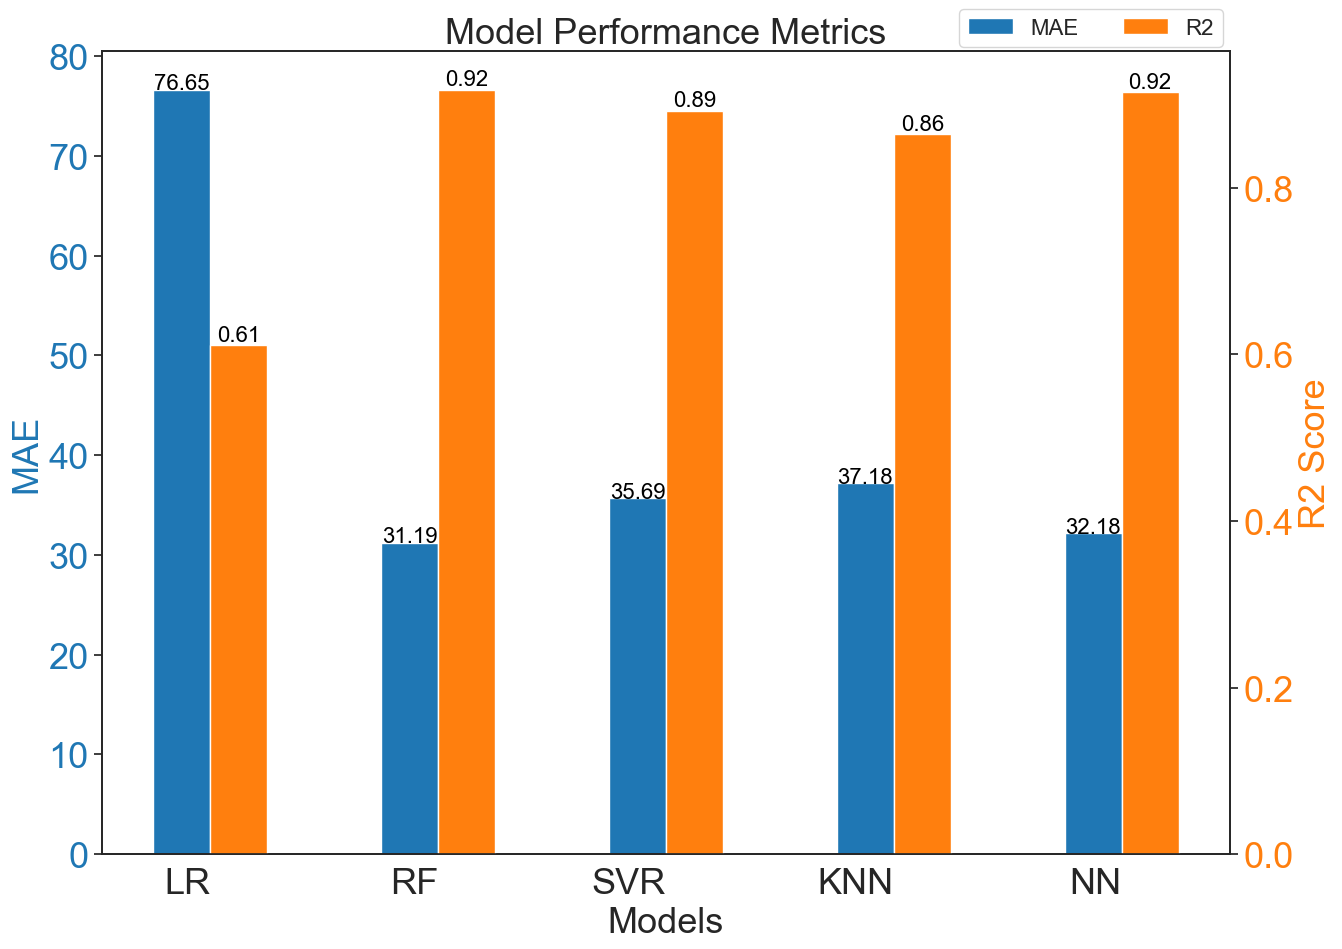

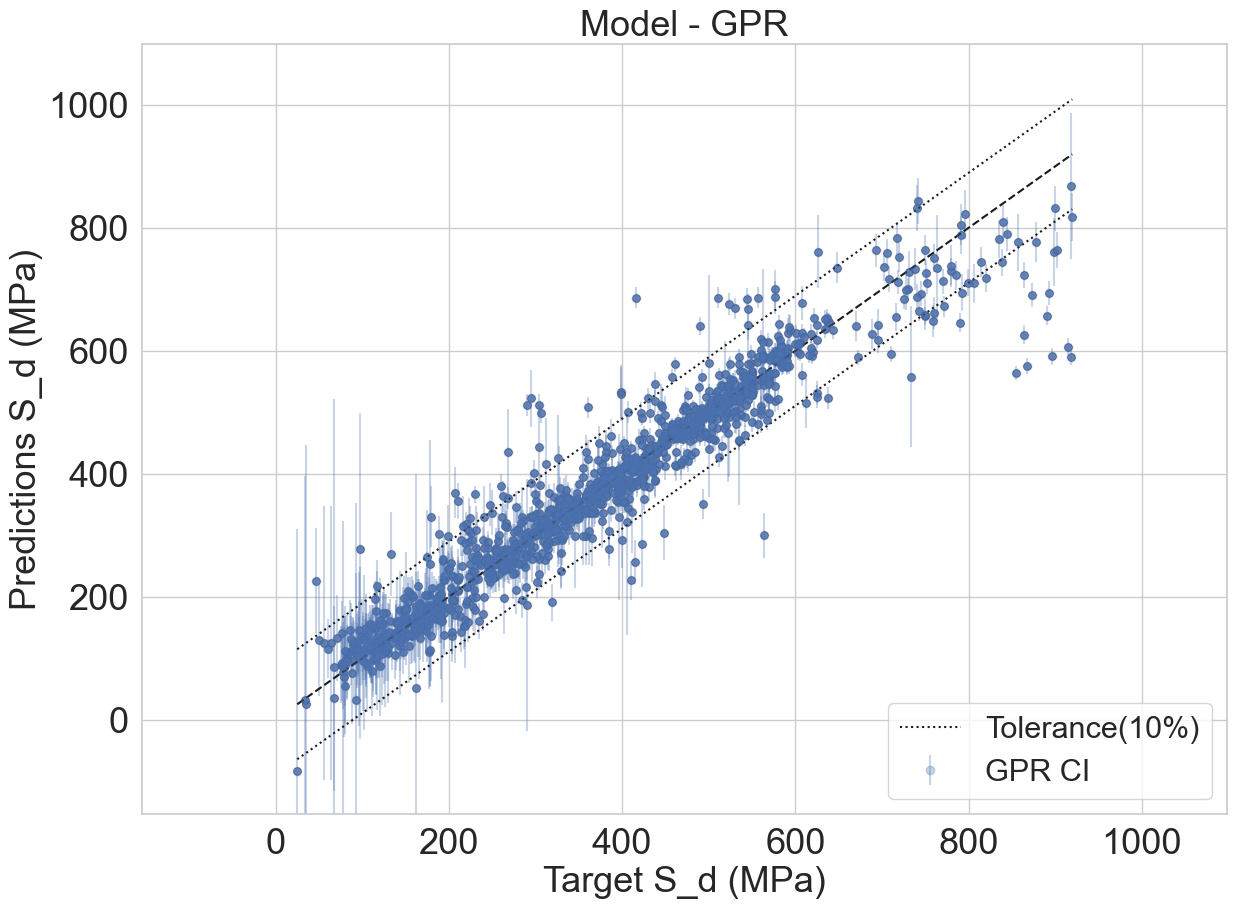

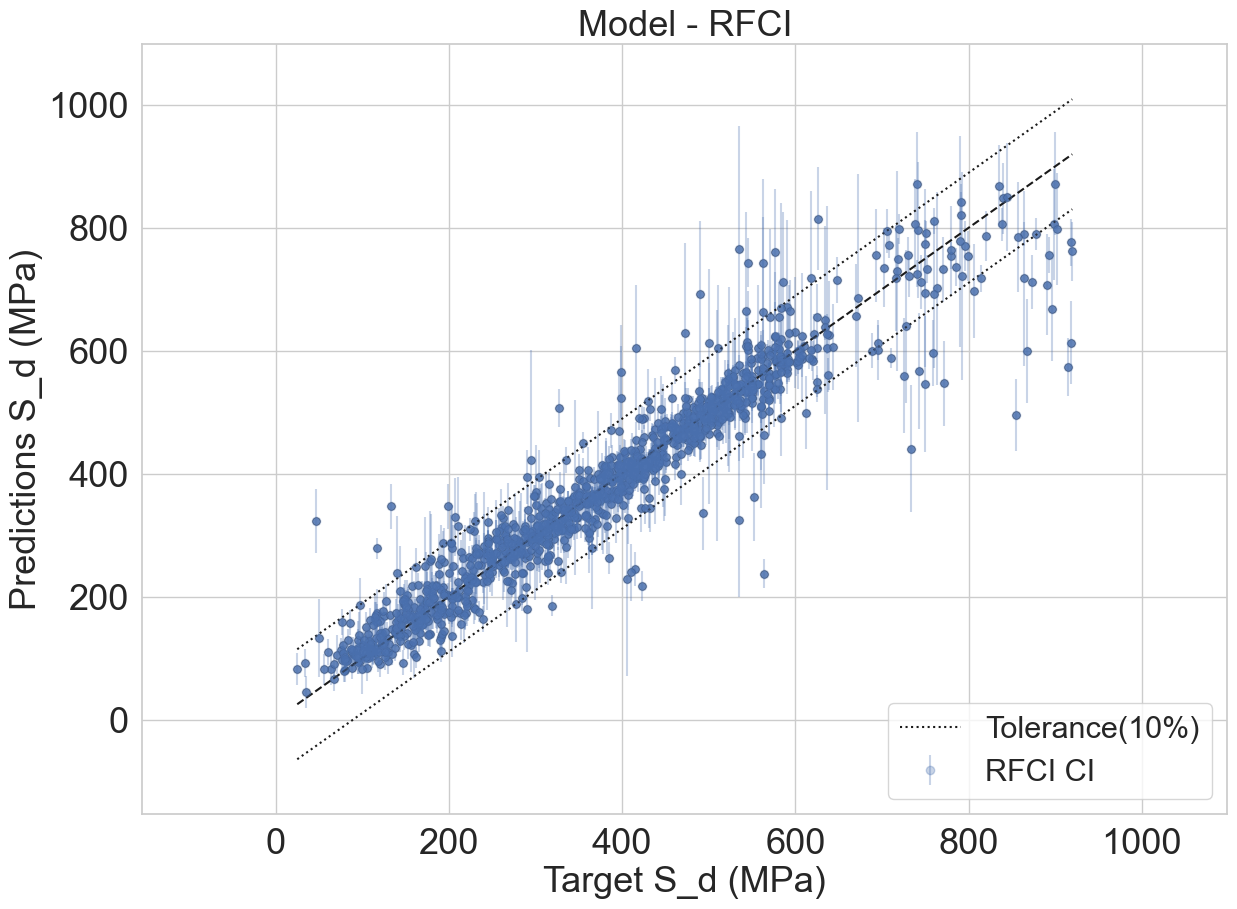

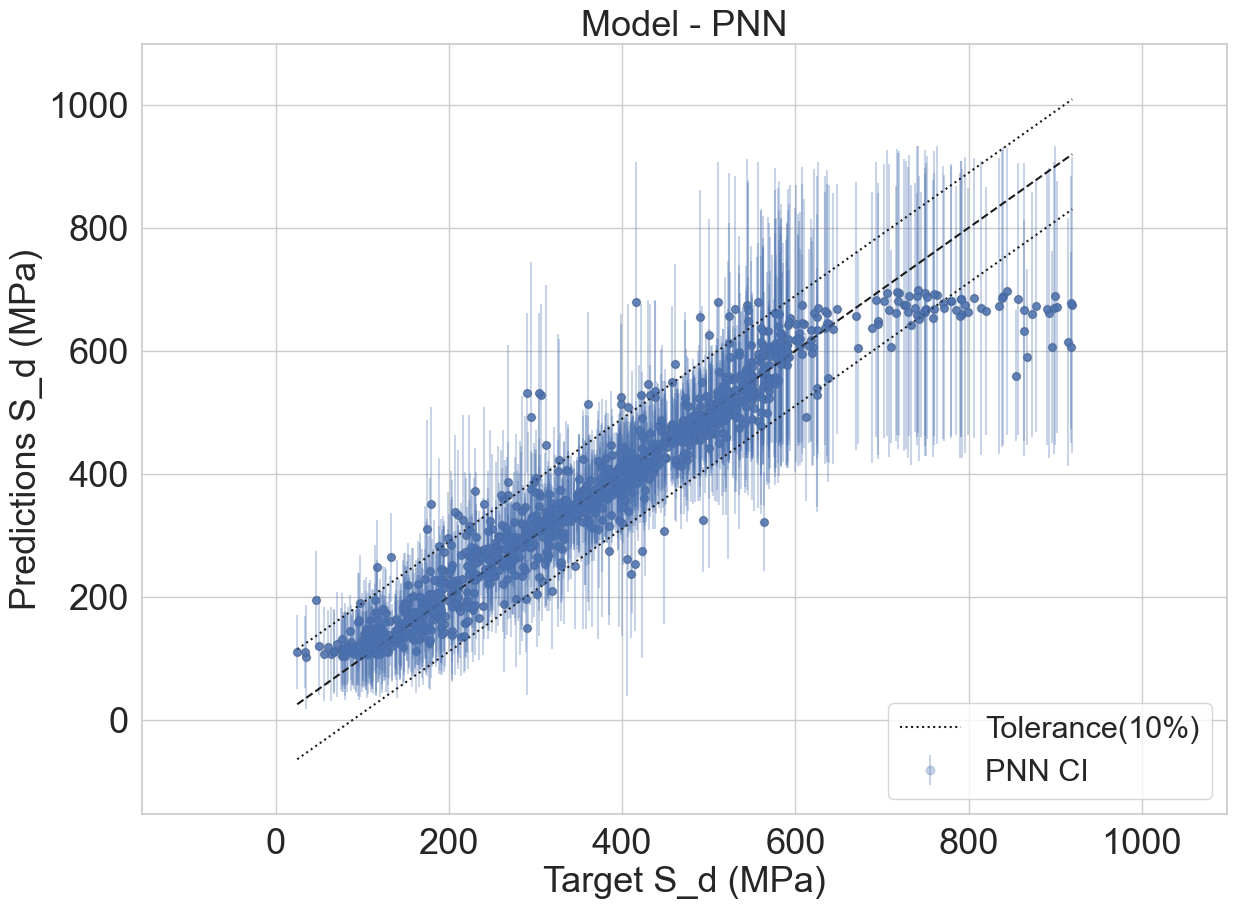

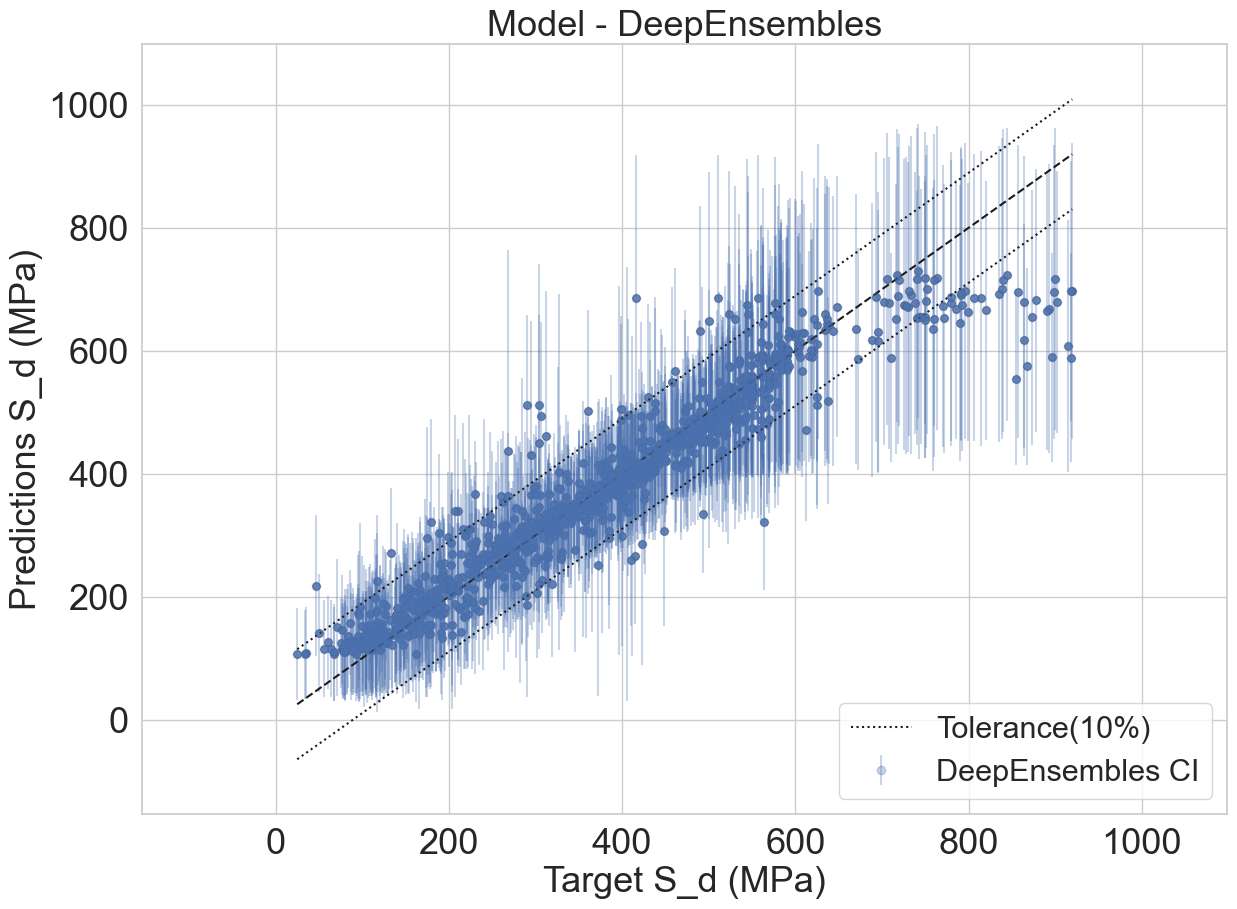

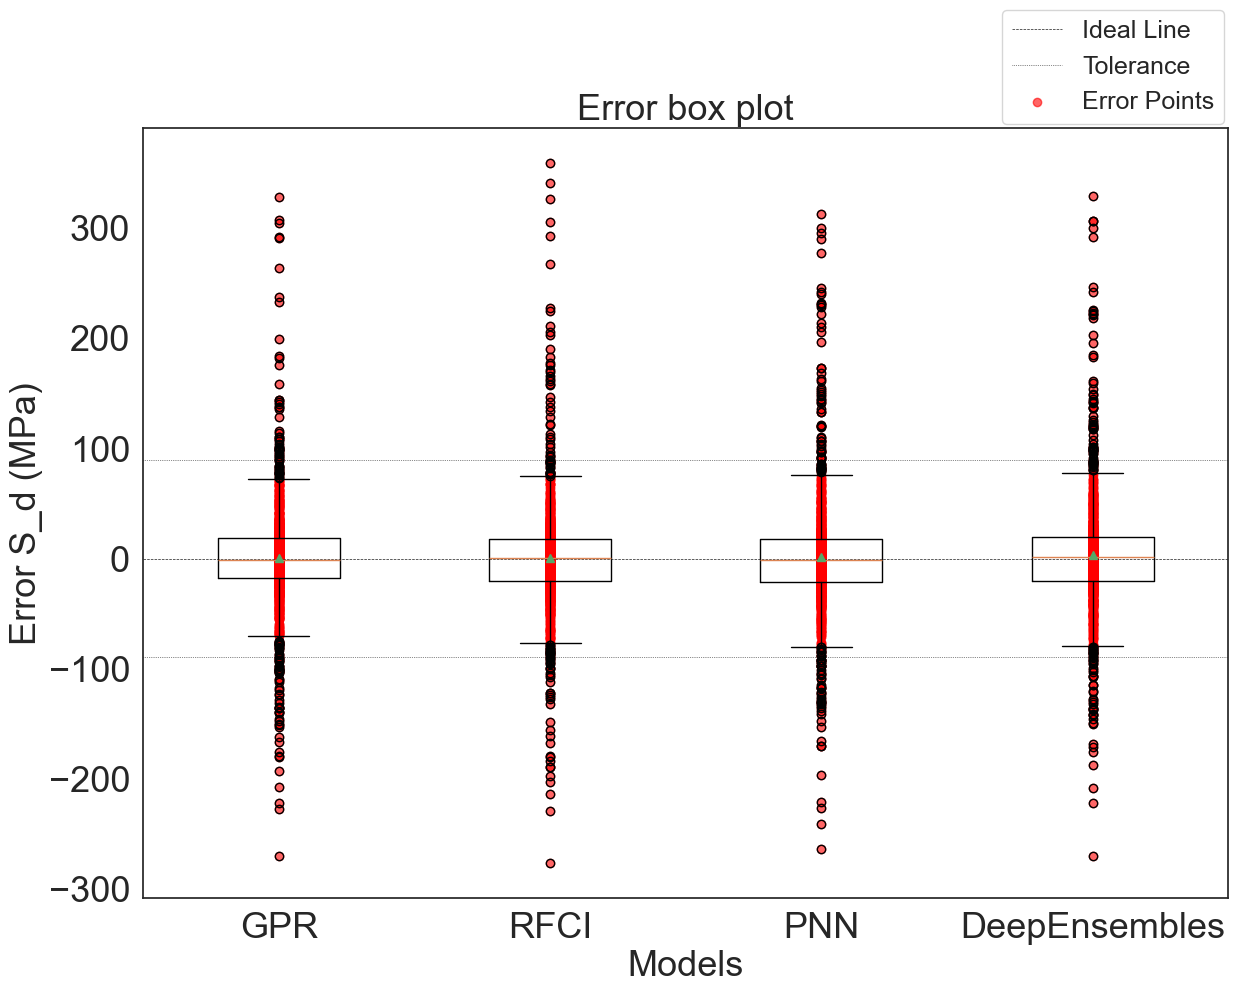

<Figure size 1400x1000 with 0 Axes>

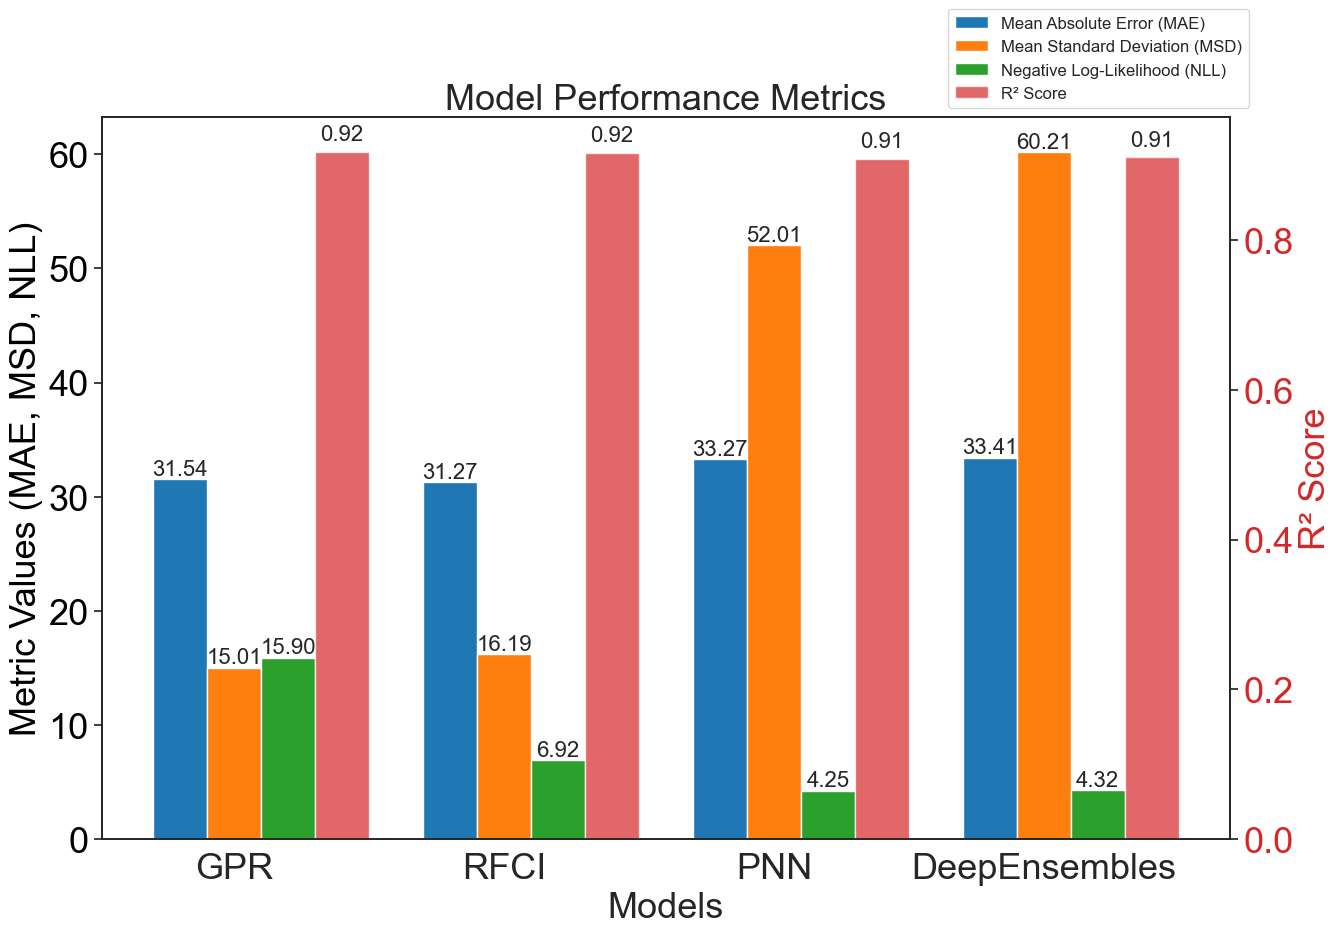

In [18]:
models_steel, best_params_det_steel, best_params_prob_steel, df_steel = pipeline.fit_transform(data_steel_nims_dabef_jsms)

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:712: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_mae = df.pivot_table(


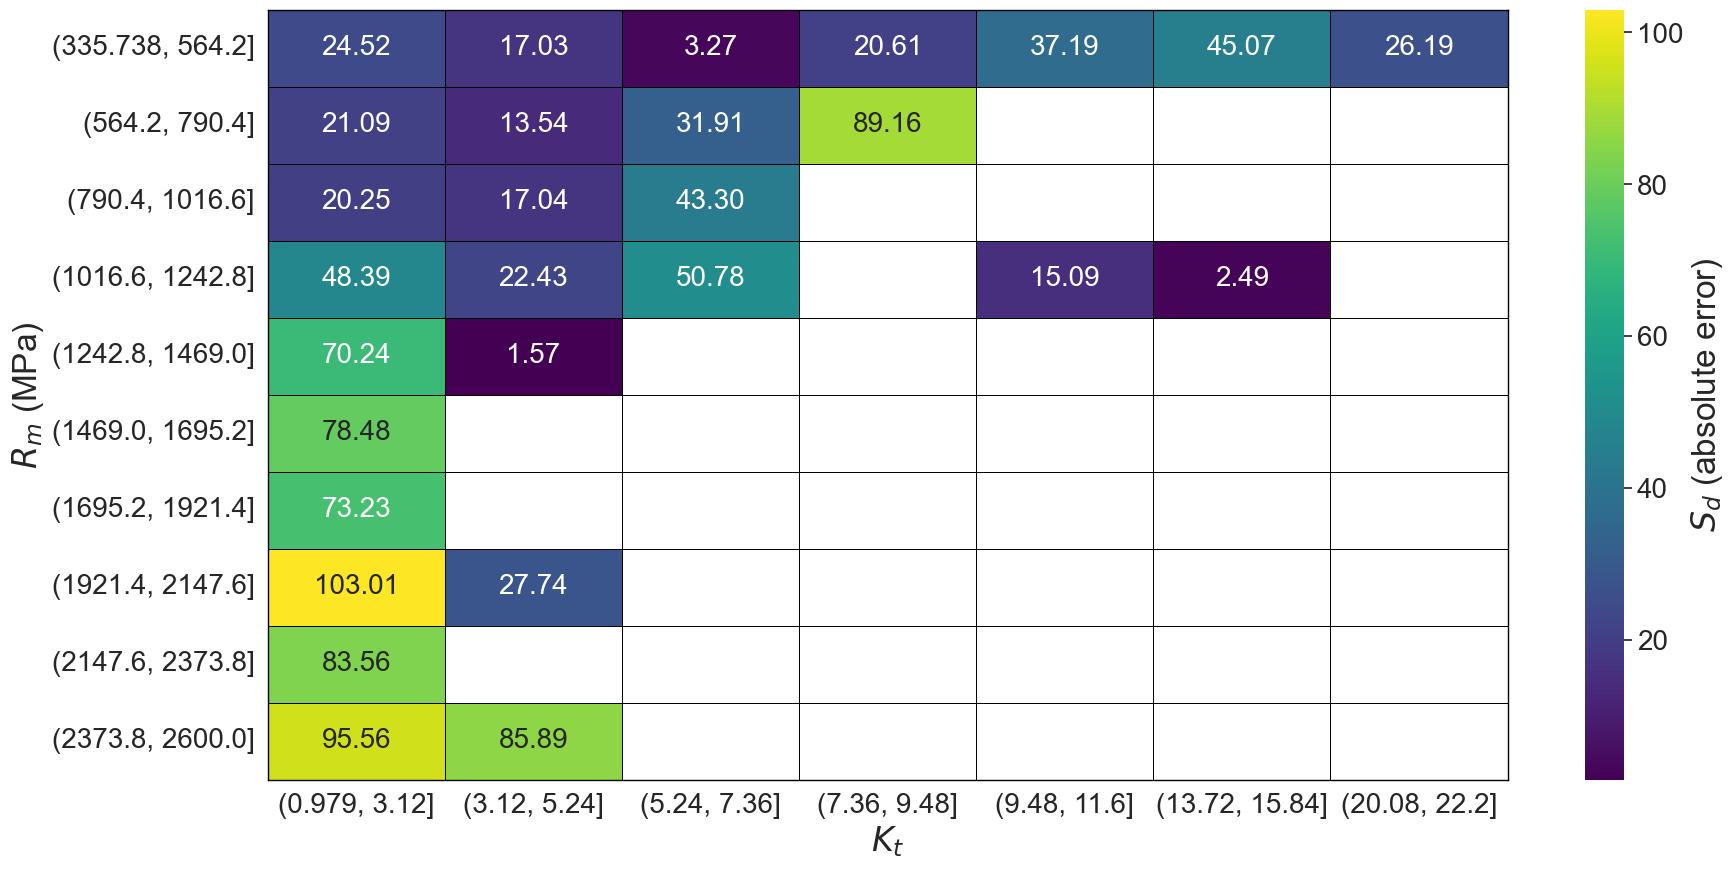

C:\Users\ngc2kor\Documents\masterthesis_angadi\NGC2KOR\src\Datavisualization.py:788: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_count = df.pivot_table(


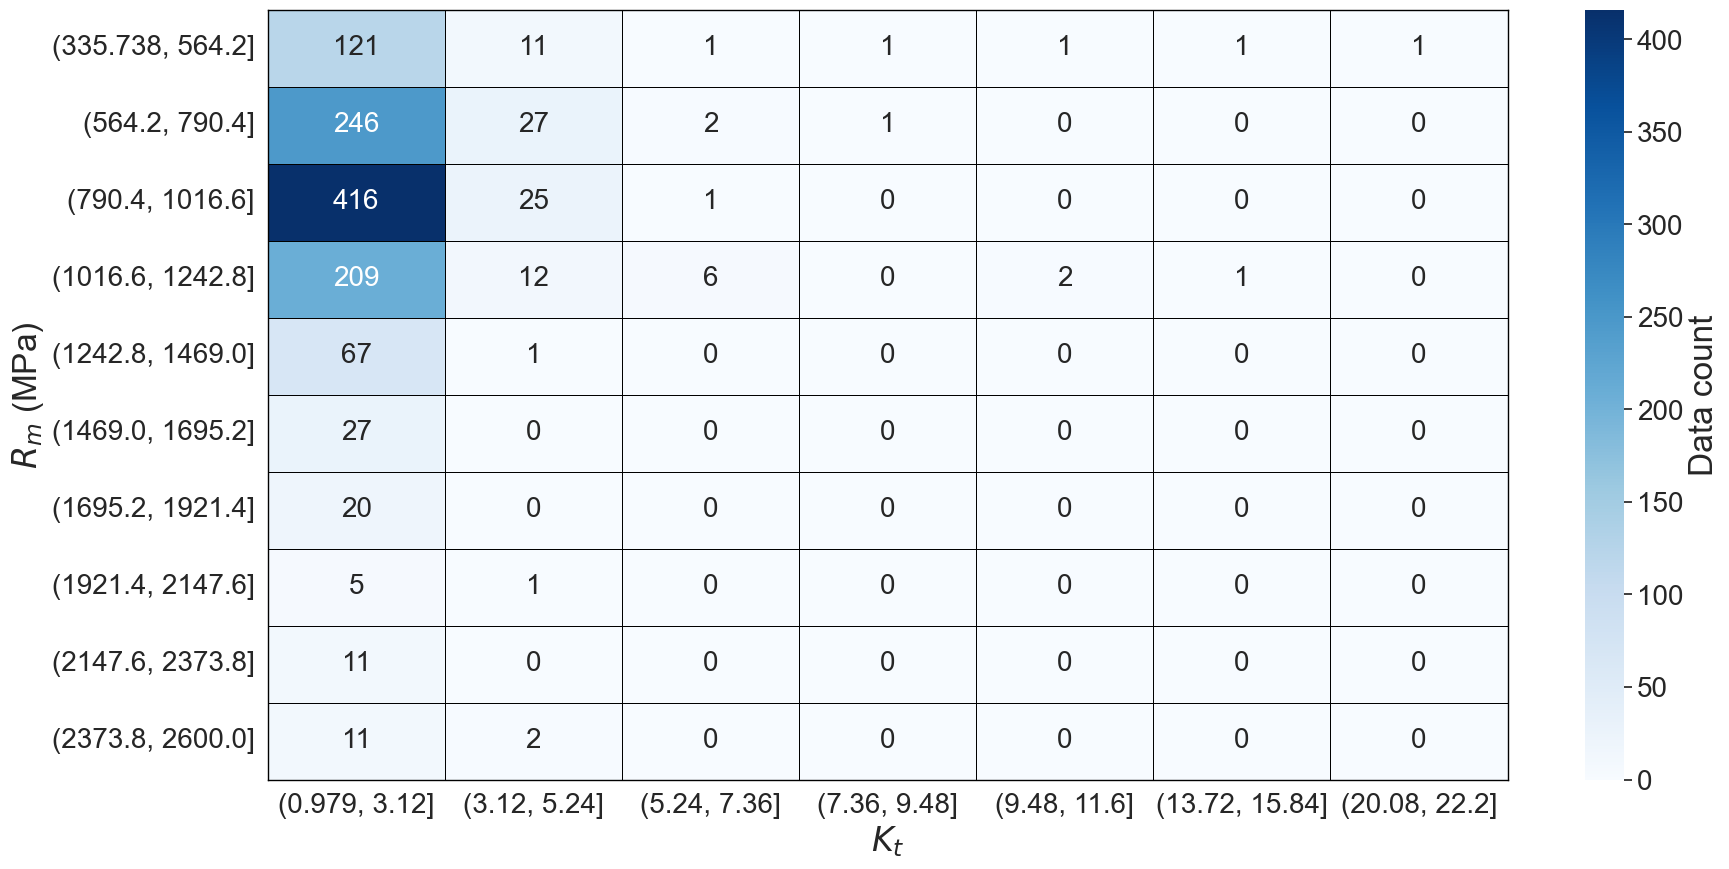

In [24]:
plot_heatmap_mae(df_steel, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='$S_d$ (absolute error)', bin_size=10, cmap="viridis")
plot_heatmap_count(df_steel, 'Rm', 'Kt', 's_d', 'Pred_NN', '$R_m$ (MPa)', '$K_t$', cbar_label='Data count', bin_size=10, cmap="Blues")